In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
plt.rcParams['figure.figsize']=[15,8]

In [5]:
dia=pd.read_csv('diabetic_data.csv')
dia.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
dia.shape

(101766, 50)

We have 50 features and 101766 rows, it shows we have enough data to do calculation

In [7]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

initial analysis shows that all the feature are in correct datatype, and there is no null value is present
target variable is readmitted

## Missing value and mismatched value

In [8]:
for cal in dia.columns:
    print('\n')
    print(cal)
    print(dia[cal].value_counts())



encounter_id
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64


patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64


race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


weight
?            98569
[75

In [9]:
dia['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

we can see that 

1. encounter_id has 0 null and mismatch value and has unique values, that is not required for the models

2. patient_nbr has 0 null value but has only 71518 rows that denotes there is a possibility of duplicate value.there can be a assumption that the same patient is admitted for more than 1 time or there is something wrong about the dataset.

3. Race feature has 2273 mismatched value, at this phase we dont know wheather the feature is significant or not. need further analysis.

4. Gender feature has 3 unkown/invalid value, at this phase we dont know wheather the feature is significant or not. need further analysis.

5. Age feature is in interval of 10 year, need feature eng. to get it ready for the model.

6. Weight feature has approx ~95% of the missing value, we cant impute any value in the place of missing value , so we can discard it.

7. admission_type_id,discharge_disposition_id,admission_source_id are coded .


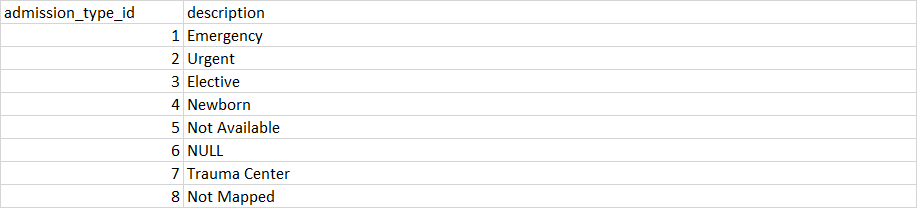

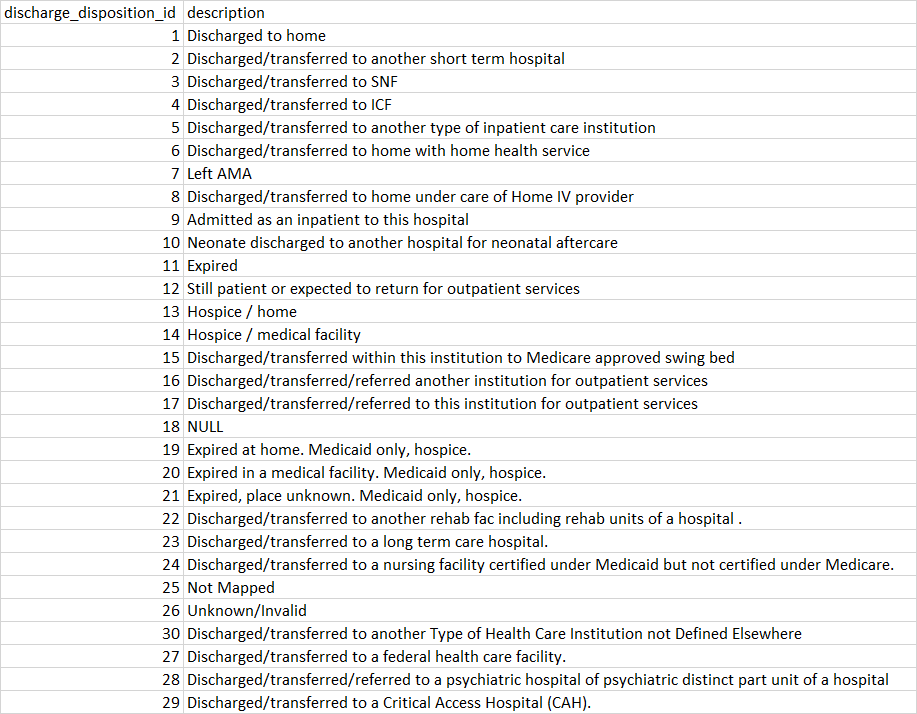

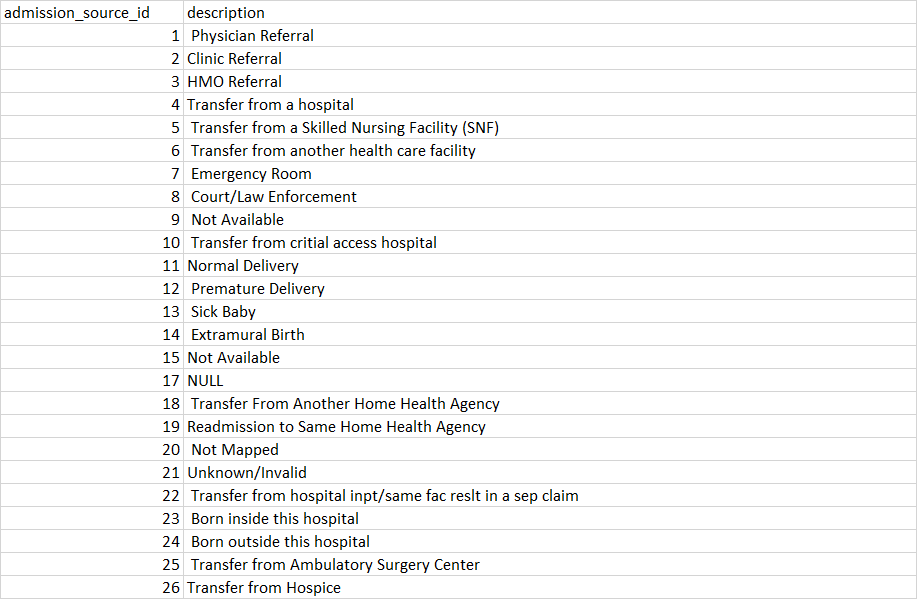

8. time in hospital tells the days spend in hospital.

9. payer code are coded.

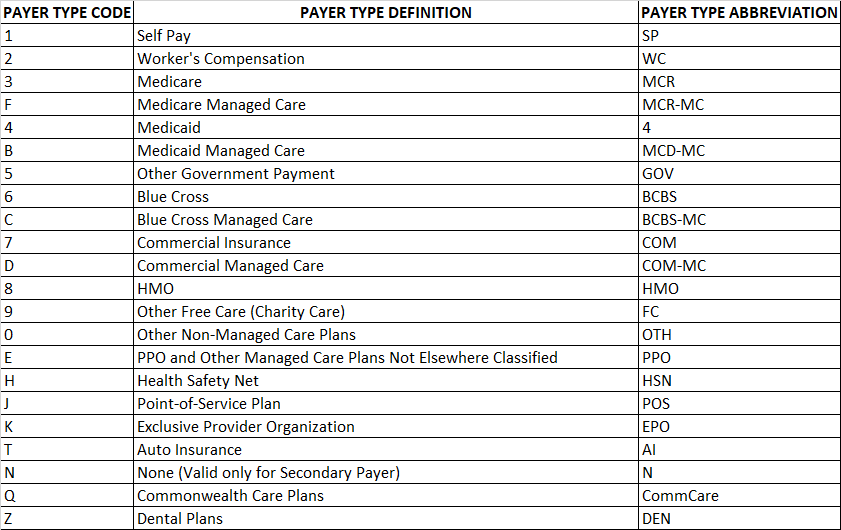

10. medical_specialty describe the department under which the patient is been intially admitted. The feature contain the 49949 unstandard missing value.

11. num_lab_procedures,num_procedures,num_medications show the number of procedure and number of medication done on the patient respectively.

12. diag_1, diag_2,diag_3 are the List of ICD-9 codes:
They are coded in ICD-9 code (https://en.wikipedia.org/wiki/List_of_ICD-9_codes)

The listing below will show you which numbers correspond to which areas of the body and types of treatment:

code|Diseases
---|---
Doctors working001-139|infectious and parasitic diseases:
140-239 |neoplasms
240-279 |endocrine, nutritional and metabolic diseases, and immunity disorders
280-289 |diseases of the blood and blood-forming organs
290-319 |mental disorders
320-359 |diseases of the nervous system
360-389| diseases of the sense organs
390-459| diseases of the circulatory system
460-519| diseases of the respiratory system
520-579| diseases of the digestive system
580-629| diseases of the genitourinary system
630-679| complications of pregnancy, childbirth, and the puerperium
680-709| diseases of the skin and subcutaneous tissue
710-739| diseases of the musculoskeletal system and connective tissue
740-759| congenital anomalies
760-779| certain conditions originating in the perinatal period
780-799| symptoms, signs, and ill-defined conditions
800-999| injury and poisoning
E and V codes| external causes of injury and supplemental classification




13. readmitted is our target variable that has three class


    NO     54864

    >30    35545

    <30    11357

# Imputing Missing Values

In [10]:
dia.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
#There is no standard missing value. instead of this our data contain missing value in form of '?'

In [11]:
dia.replace('?',np.nan,inplace=True)

In [12]:
total=dia.isnull().sum().sort_values(ascending=False)
percent=round(((total/dia.shape[0])*100),2)
percent=percent.sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percentage'])
missing_data['Type']=dia[missing_data.index].dtypes
missing_data

,Total,Percentage,Type
weight,98569,96.86,object
medical_specialty,49949,49.08,object
payer_code,40256,39.56,object
race,2273,2.23,object
diag_3,1423,1.40,object
diag_2,358,0.35,object
diag_1,21,0.02,object
encounter_id,0,0.00,int64
tolazamide,0,0.00,object
glyburide,0,0.00,object


In [13]:
#making a copy for further use
dia_copy=dia.copy()

the uninformative features in the dataset (21 in total) were discarded as shown in the table below, due to either, a huge amount of missing sample values (>50%), or due to the fact that somefeatures are not relevant to classify the data towards our target (Like patient ID), or if the feature is compeletly unbalanced (>95% of data points have the same value for the feature).

Feature|Discarding Reasons
---|---
incounter_id|Irrelevant to our target (readmitted)
Patient_nbr|Irrelevant to our target (readmitted)
Weight|97% of samples are missing
Payer_code|Irrelevant to our target (readmitted)
Medical_speciality|53% of samples are missing
Repaglinide|>100K samples not using the drug
Nateglinide|>100K samples not using the drug
Chlorpropamide|>100K samples not using the drug
Acarbose|>100K samples not using the drug
Miglitol|>100K samples not using the drug
Troglitazone|Only 3 patients using the drug
Tolazamide|Only 39 patients using the drug
Examide|All patients not using the drug
Citoglipton|All patients not using the drug
Glyburide_metformin|>100K samples not using the drug
Glipizide_metfotmin|Only 13 patients using the drug
Glimepiride_pioglitazone|Only 1 patient using the drug
Metformin_rosiglitazone|Only 2 patients using the drug
Metformin_pioglitazone|Only 1 patient using the drug
Acetohexamide|Only 1 patient using the drug
tolbutamide|Only 23 patients using the drug

In [14]:
insignificantfeatures = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']

In [15]:
dia.drop(insignificantfeatures, axis=1,inplace=True)

In [16]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101745 non-null  object
 14  diag

# Race Feature 

In [17]:
dia['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [18]:
dia['race'].isnull().sum()

2273

In [19]:
dia['race'].fillna('Other',inplace=True)

In [20]:
dia['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

# Gender Feature

In [21]:
dia.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [22]:
dia['gender'] = dia['gender'].replace('Unknown/Invalid', 'Female')
dia.gender.value_counts()

Female    54711
Male      47055
Name: gender, dtype: int64

# diagnosis feature

In [23]:
#setting all missing values into -1
dia['diag_1'].fillna(-1,inplace=True)
dia['diag_2'].fillna(-1,inplace=True)
dia['diag_3'].fillna(-1,inplace=True)

In [24]:
dia.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [25]:
df_num=dia.select_dtypes(include=np.number)
df_cat=dia.select_dtypes(include='object')

# Univarient Analysis

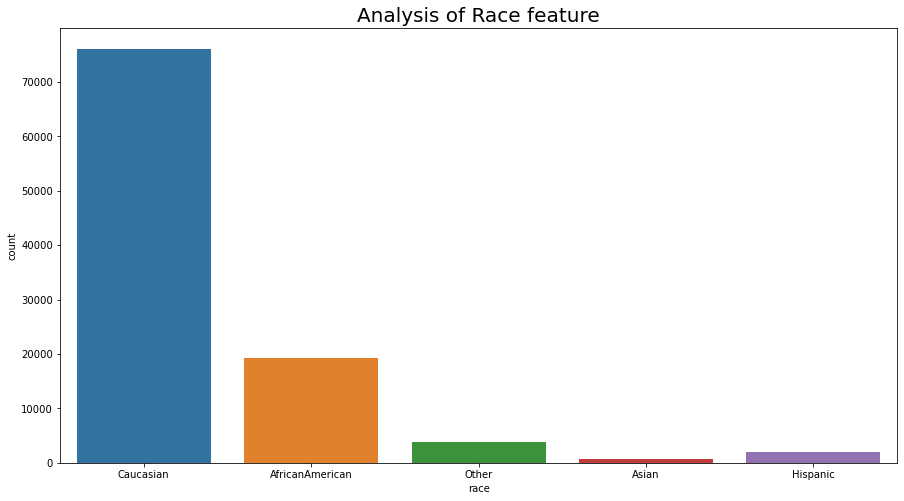

In [26]:
sns.countplot(x=dia['race'])
plt.title('Analysis of Race feature',fontsize=20)
plt.show()

the most number of people who are readmitted are of caucasian race , least number of people are from asian race.

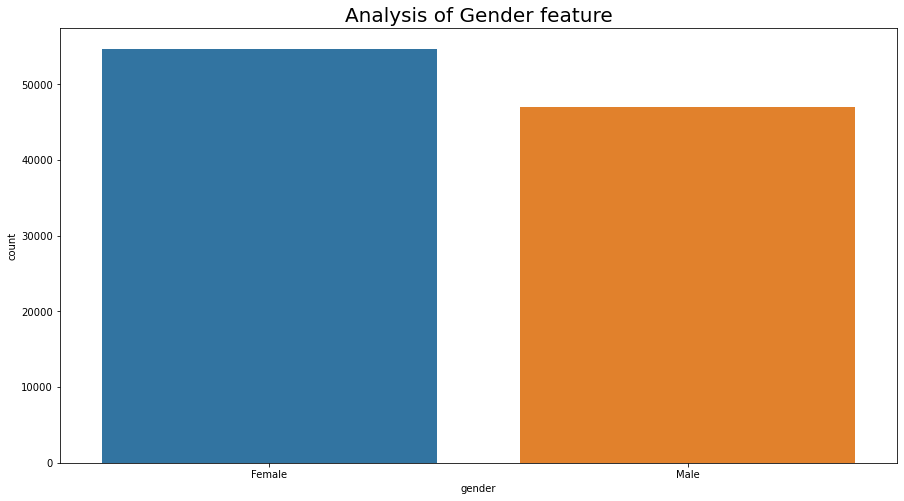

In [27]:
sns.countplot(x=dia['gender'])
plt.title('Analysis of Gender feature',fontsize=20)
plt.show()

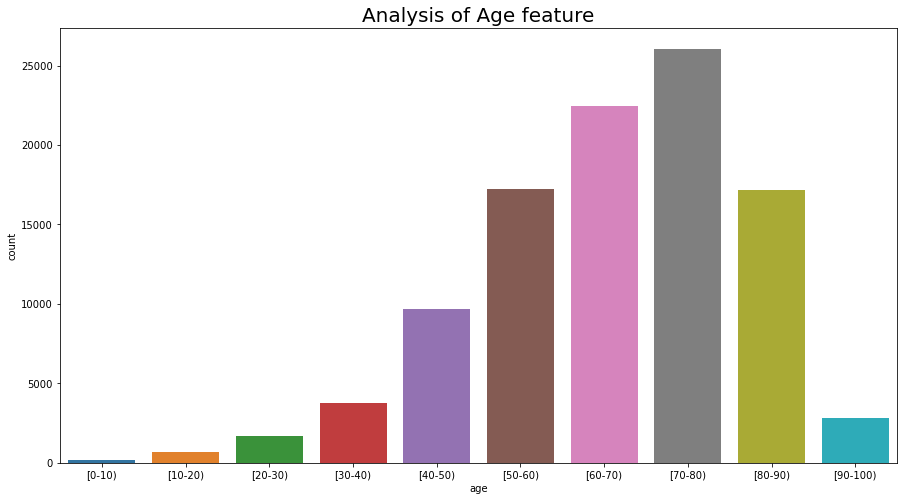

In [28]:
sns.countplot(x=dia['age'])
plt.title('Analysis of Age feature',fontsize=20)
plt.show()

Most number of patients are from the age group of 70 to 80 interval, but we can see that the 90-100 age group have less patient compare the 80-90 , that can show that maybe the datset contain the less number of data is avalable in the dataset.

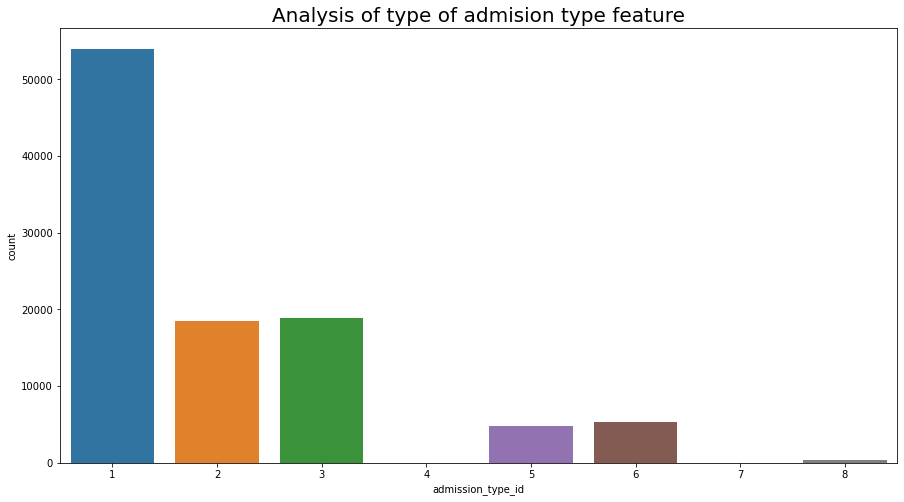

In [29]:
sns.countplot(x=dia['admission_type_id'])
plt.title('Analysis of type of admision type feature',fontsize=20)
plt.show()

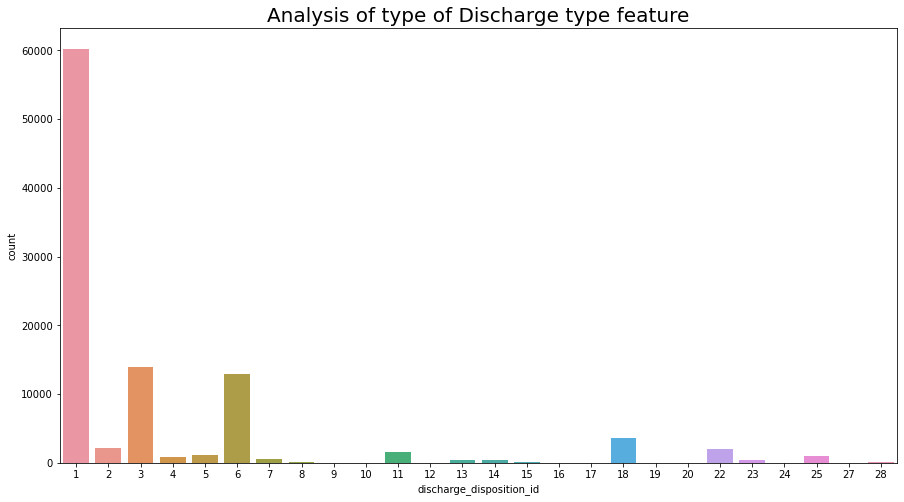

In [30]:
sns.countplot(x=dia['discharge_disposition_id'])
plt.title('Analysis of type of Discharge type feature',fontsize=20)
plt.show()

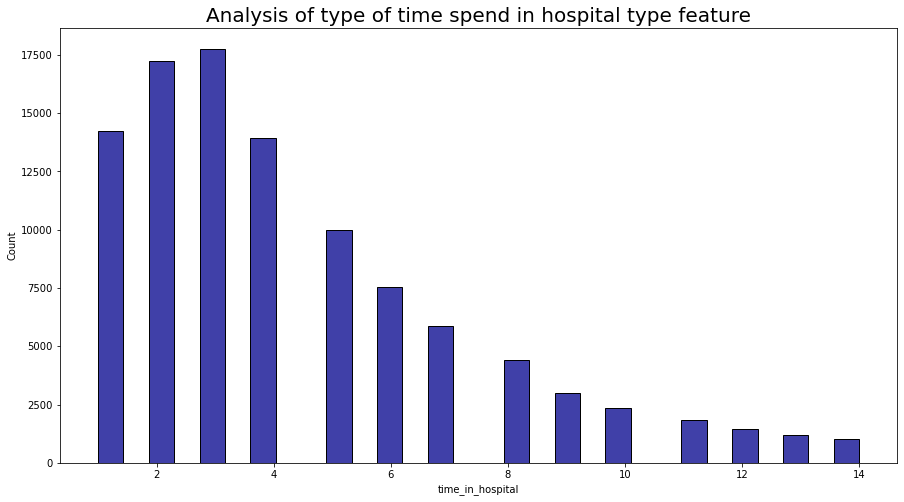

In [31]:
sns.histplot(x=dia['time_in_hospital'],bins=30,color="darkblue")
plt.title('Analysis of type of time spend in hospital type feature',fontsize=20)
plt.show()

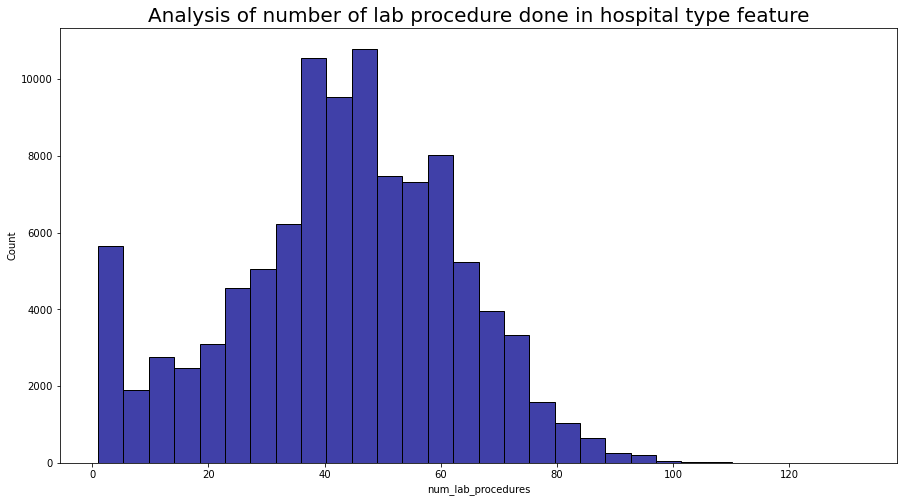

In [32]:
sns.histplot(x=dia['num_lab_procedures'],bins=30,color="darkblue")
plt.title('Analysis of number of lab procedure done in hospital type feature',fontsize=20)
plt.show()

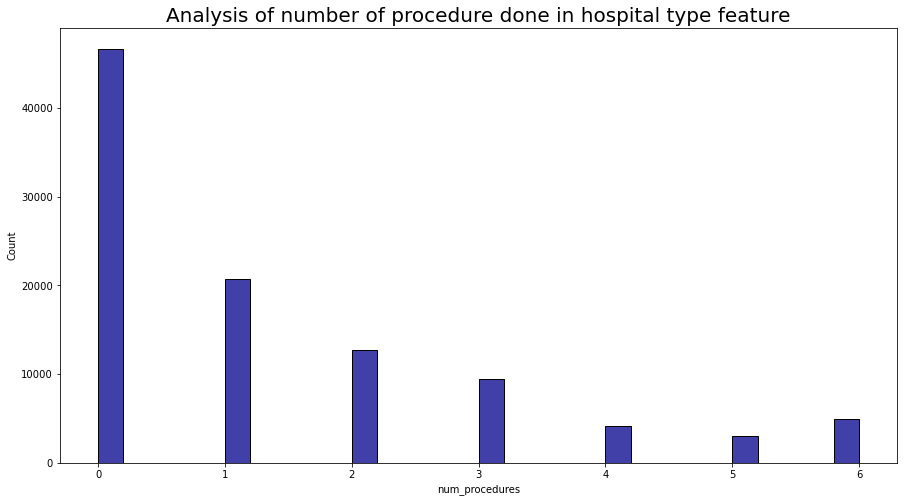

In [33]:
sns.histplot(x=dia['num_procedures'],bins=30,color="darkblue")
plt.title('Analysis of number of procedure done in hospital type feature',fontsize=20)
plt.show()

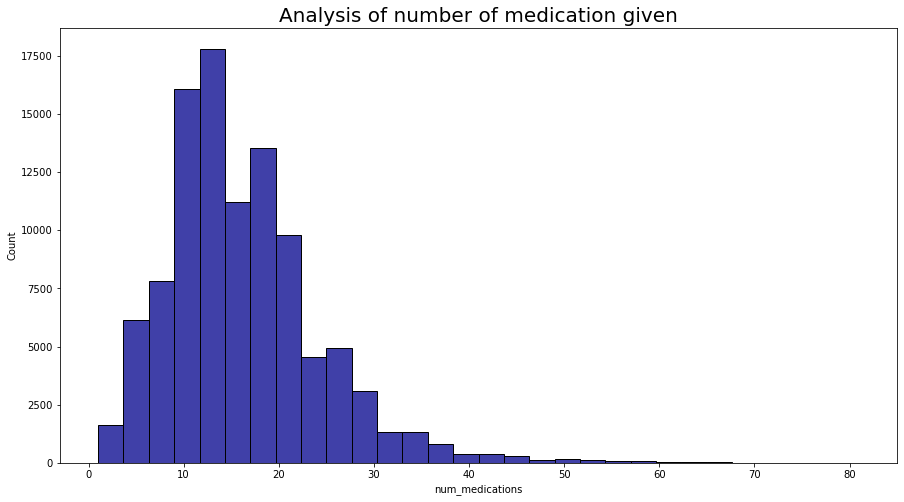

In [34]:
sns.histplot(x=dia['num_medications'],bins=30,color="darkblue")
plt.title('Analysis of number of medication given',fontsize=20)
plt.show()

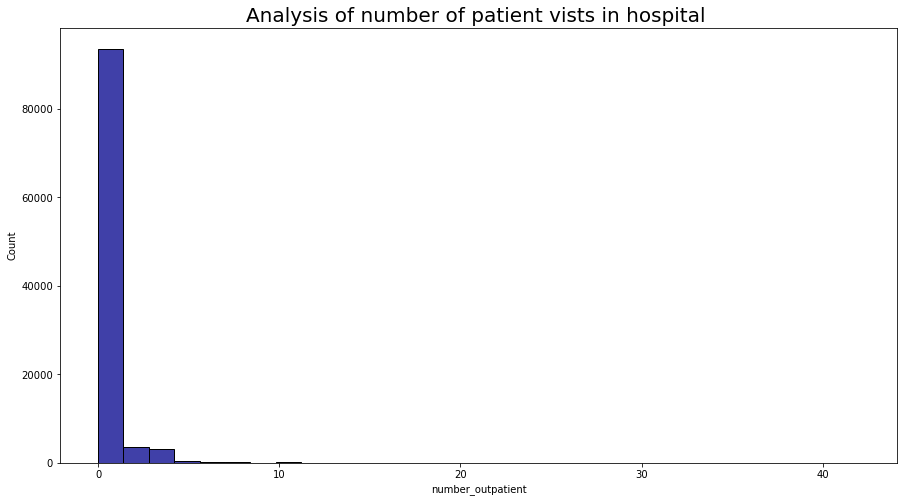

In [35]:
sns.histplot(x=dia['number_outpatient'],bins=30,color="darkblue")
plt.title('Analysis of number of patient vists in hospital ',fontsize=20)
plt.show()

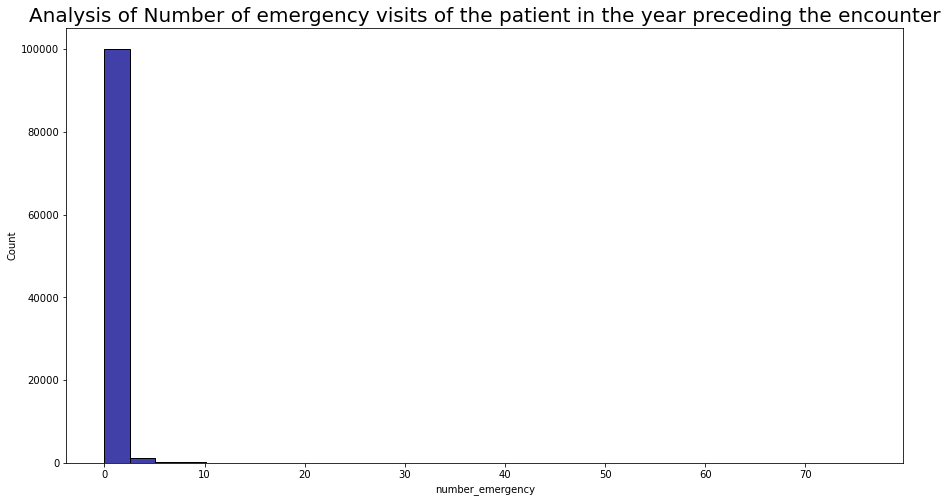

In [36]:
sns.histplot(x=dia['number_emergency'],bins=30,color="darkblue")
plt.title('Analysis of Number of emergency visits of the patient in the year preceding the encounter',fontsize=20)
plt.show()

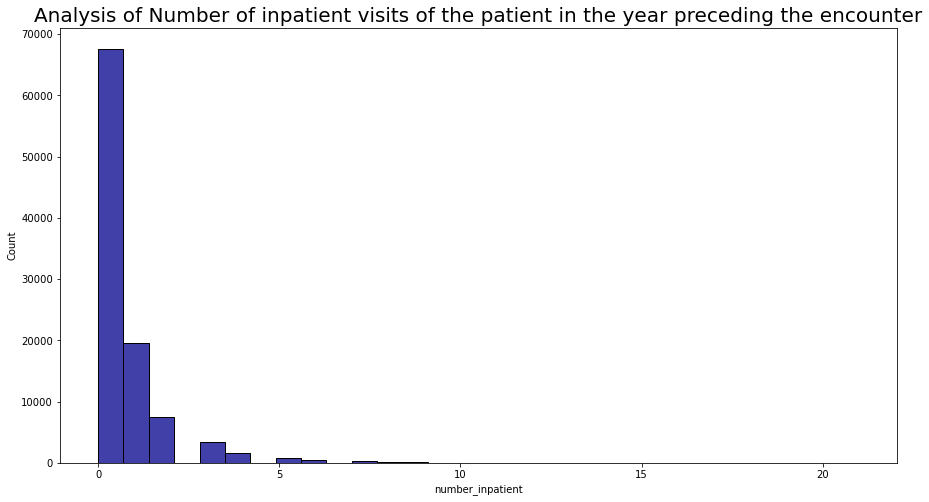

In [37]:
sns.histplot(x=dia['number_inpatient'],bins=30,color="darkblue")
plt.title('Analysis of Number of inpatient visits of the patient in the year preceding the encounter',fontsize=20)
plt.show()

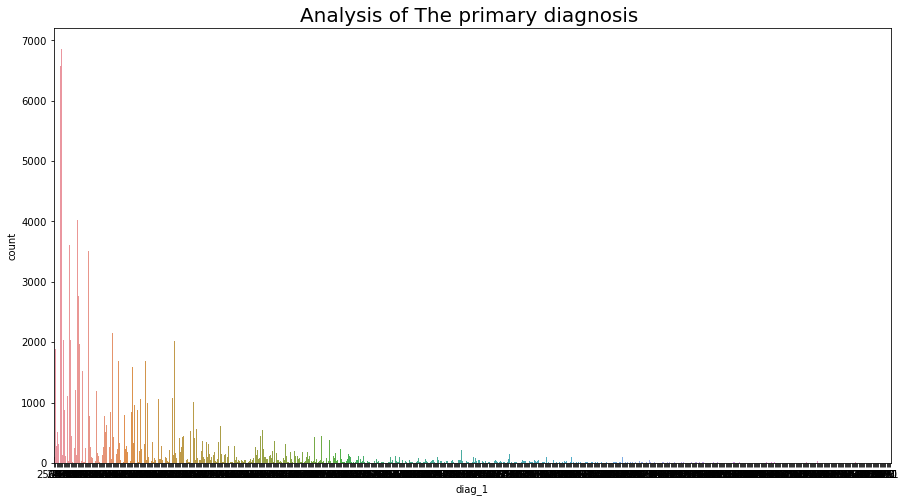

In [38]:
sns.countplot(x=dia['diag_1'])
plt.title('Analysis of The primary diagnosis ',fontsize=20)
plt.show()

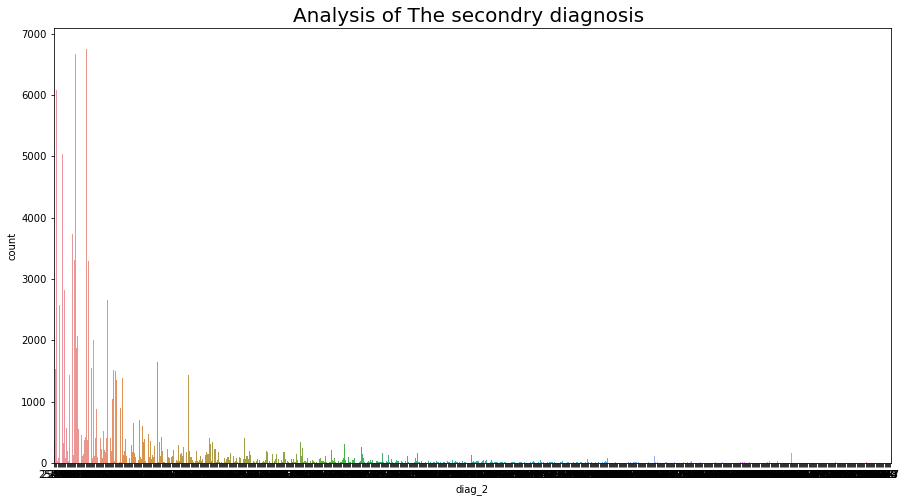

In [39]:
sns.countplot(x=dia['diag_2'])
plt.title('Analysis of The secondry diagnosis ',fontsize=20)
plt.show()

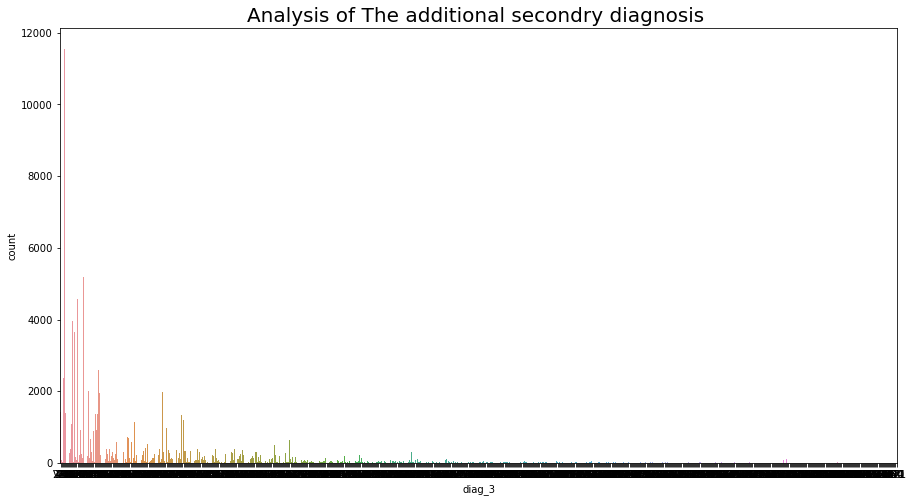

In [40]:
sns.countplot(x=dia['diag_3'])
plt.title('Analysis of The additional secondry diagnosis ',fontsize=20)
plt.show()

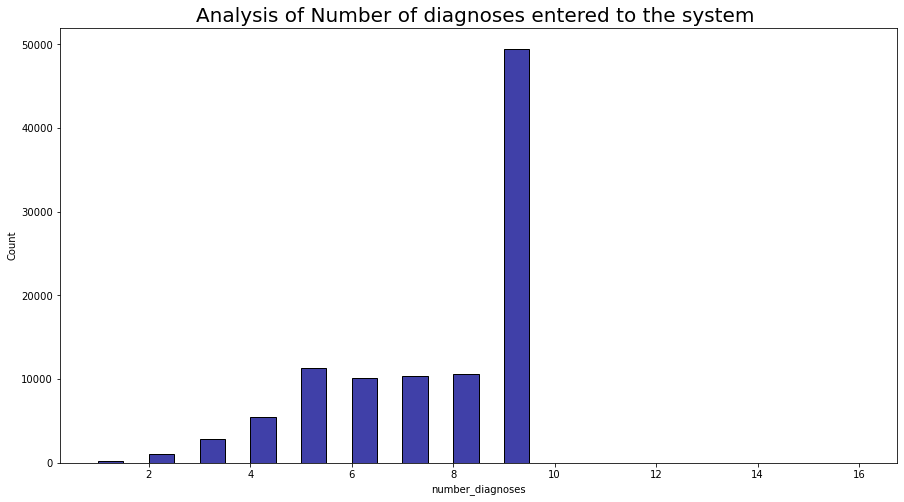

In [41]:
sns.histplot(x=dia['number_diagnoses'],bins=30,color="darkblue")
plt.title('Analysis of Number of diagnoses entered to the system ',fontsize=20)
plt.show()

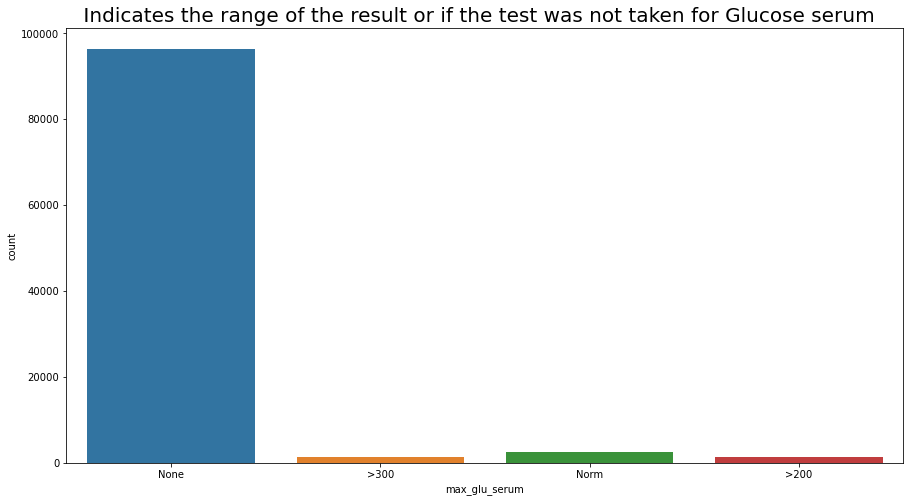

In [42]:
sns.countplot(x=dia.max_glu_serum)
plt.title(' Indicates the range of the result or if the test was not taken for Glucose serum   ',fontsize=20)

plt.show()

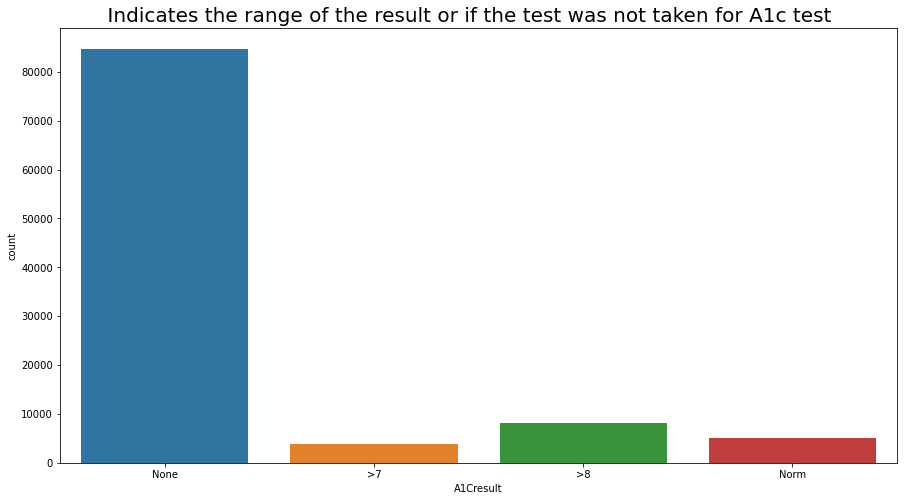

In [43]:
sns.countplot(x=dia['A1Cresult'])
plt.title(' Indicates the range of the result or if the test was not taken for A1c test    ',fontsize=20)
plt.show()

In [44]:
dia.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

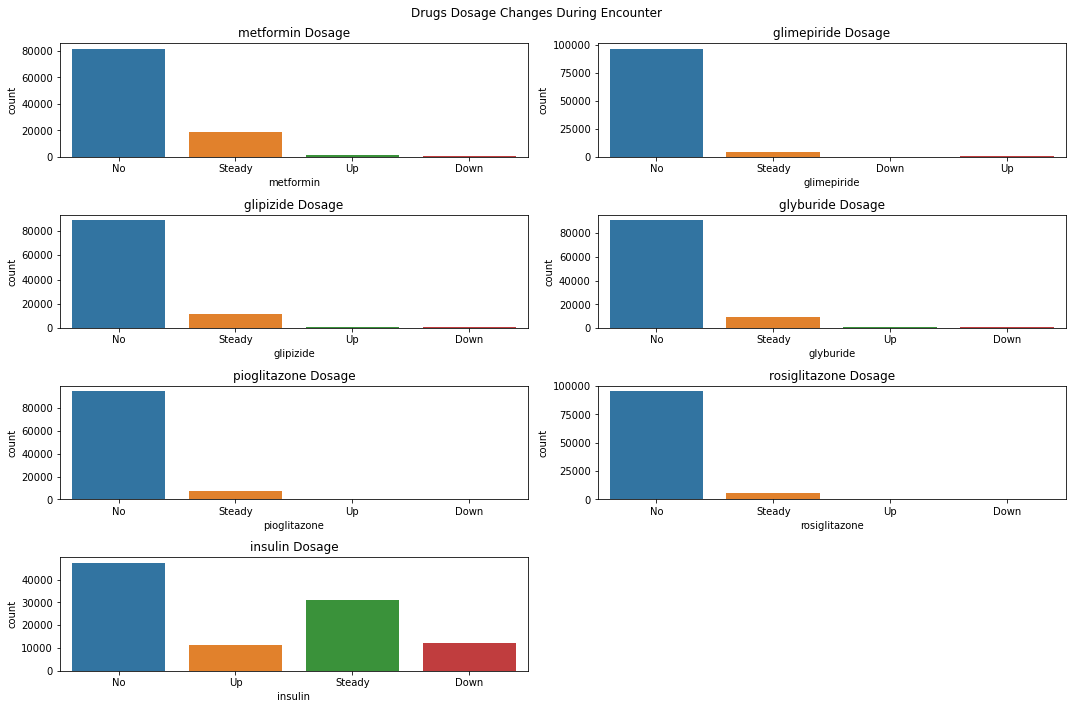

In [45]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)

sns.countplot(x=dia['metformin'], ax=ax1)
ax1.set_title('metformin Dosage')
sns.countplot(x=dia['glimepiride'], ax=ax2)
ax2.set_title('glimepiride Dosage')
sns.countplot(x=dia['glipizide'], ax=ax3)
ax3.set_title('glipizide Dosage')
sns.countplot(x=dia['glyburide'], ax=ax4)
ax4.set_title('glyburide Dosage')
sns.countplot(x=dia['pioglitazone'], ax=ax5)
ax5.set_title('pioglitazone Dosage')
sns.countplot(x=dia['rosiglitazone'], ax=ax6)
ax6.set_title('rosiglitazone Dosage')
sns.countplot(x=dia['insulin'], ax=ax7)
ax7.set_title('insulin Dosage')

fig.suptitle('Drugs Dosage Changes During Encounter')


plt.tight_layout()
plt.show()

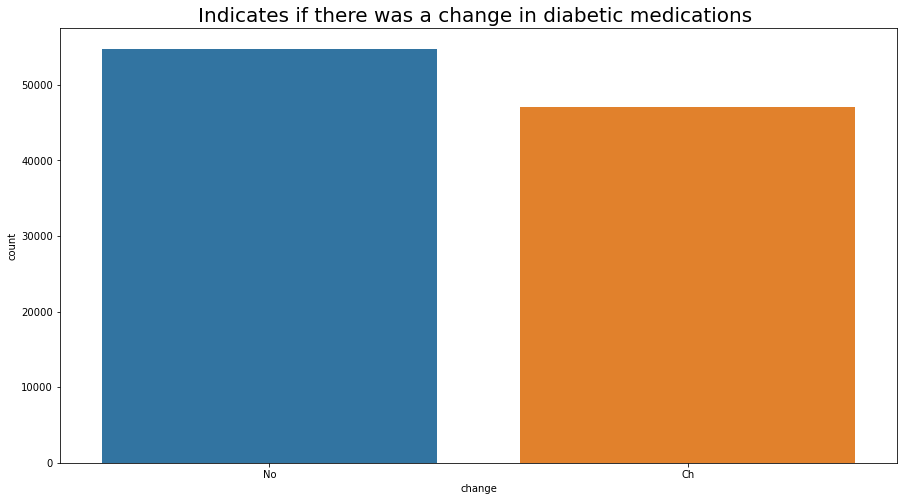

In [46]:
sns.countplot(x=dia['change'])
plt.title('Indicates if there was a change in diabetic medications ',fontsize=20)
plt.show()

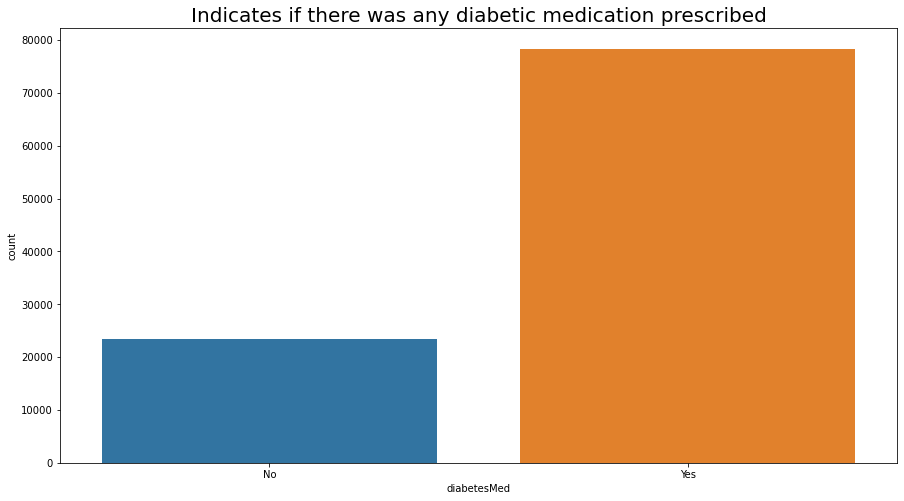

In [47]:
sns.countplot(x=dia['diabetesMed'])
plt.title('Indicates if there was any diabetic medication prescribed',fontsize=20)
plt.show()

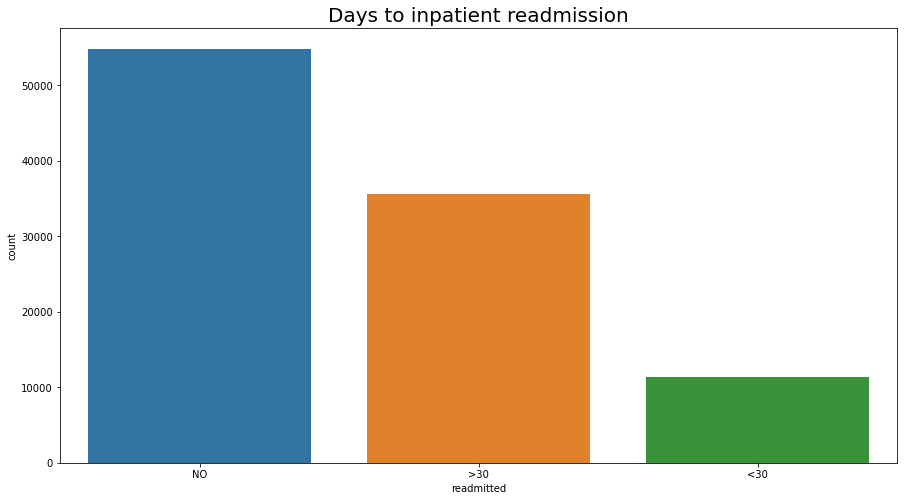

In [48]:
sns.countplot(x=dia['readmitted'])
plt.title('Days to inpatient readmission',fontsize=20)
plt.show()

# Bivariate Analysis

### Time in hospital

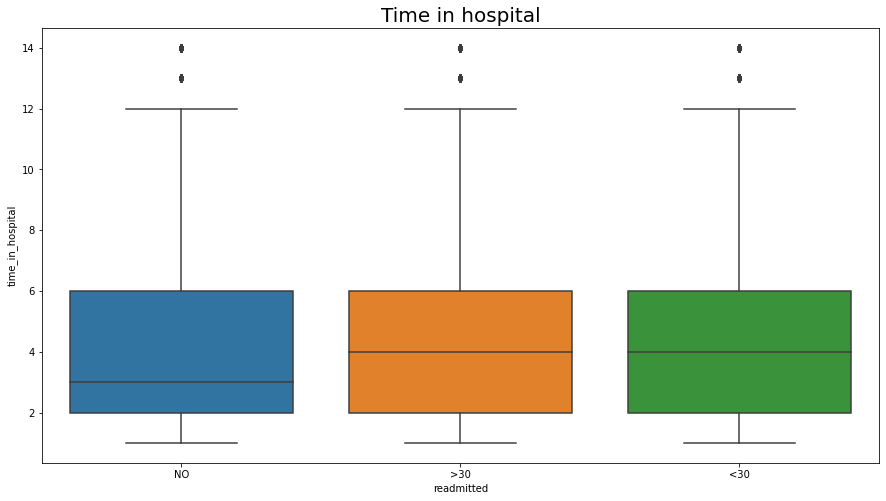

In [49]:
sns.boxplot(y='time_in_hospital',x='readmitted',data=dia)
plt.title('Time in hospital',fontsize=20)
plt.show()

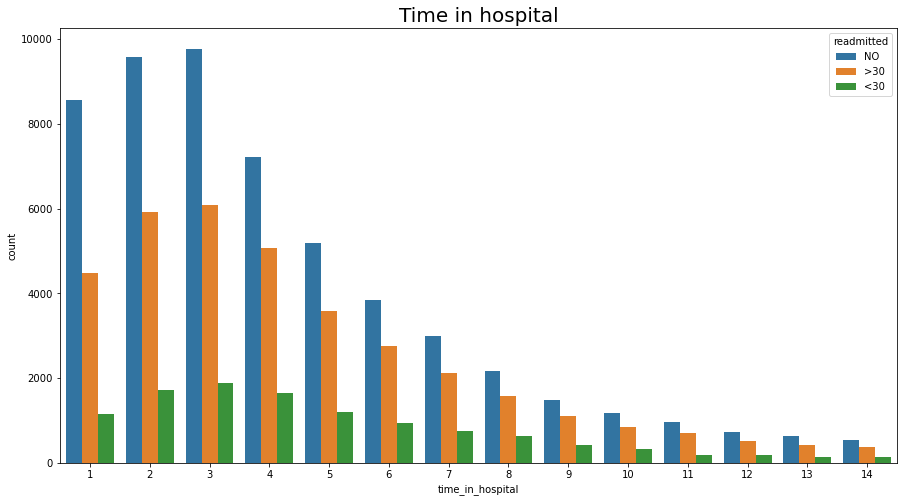

In [50]:
sns.countplot(x='time_in_hospital',hue='readmitted',data=dia)
plt.title('Time in hospital',fontsize=20)
plt.show()

### Number of lab procedures

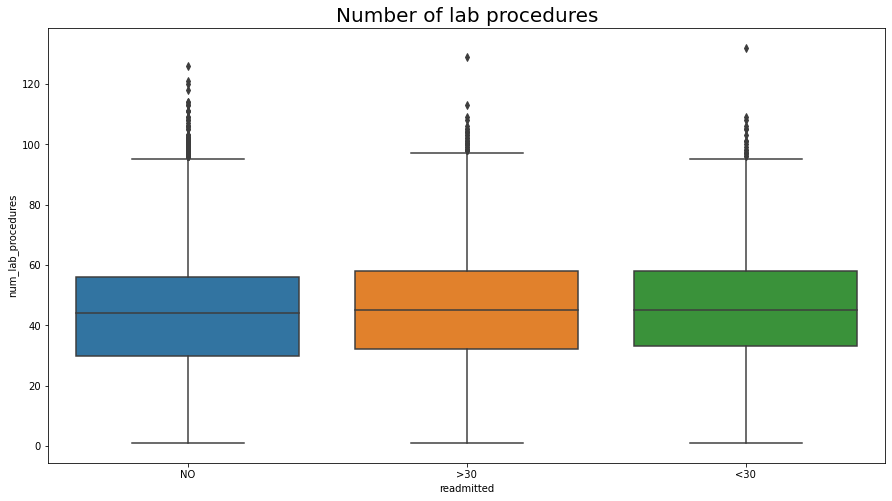

In [51]:
sns.boxplot(y='num_lab_procedures',x='readmitted',data=dia)
plt.title('Number of lab procedures',fontsize=20)
plt.show()

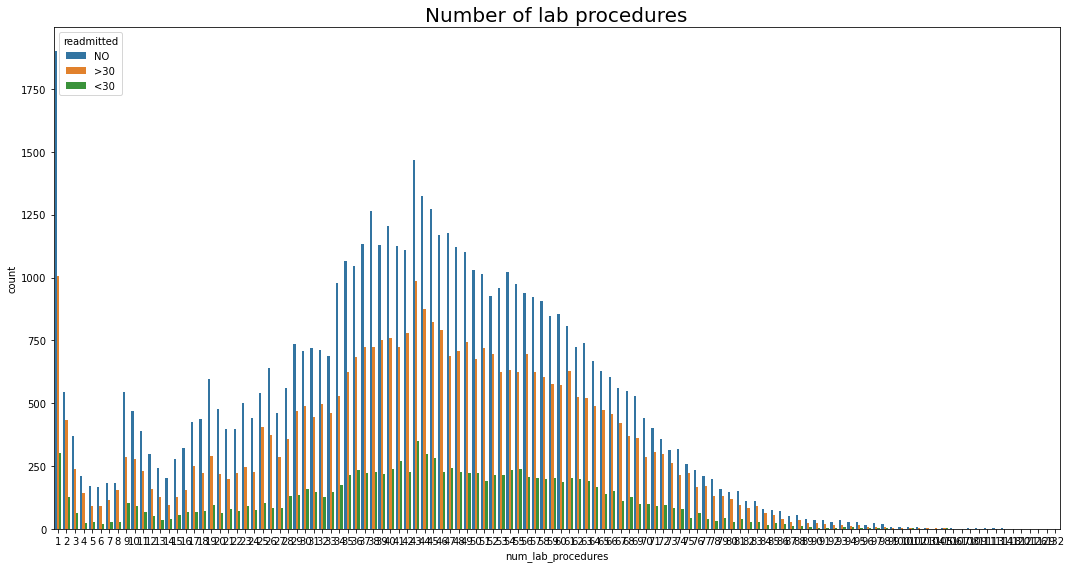

In [52]:
sns.countplot(x='num_lab_procedures',hue='readmitted',data=dia)
plt.title('Number of lab procedures',fontsize=20)
plt.tight_layout()
plt.show()

### Number procedures other than lab

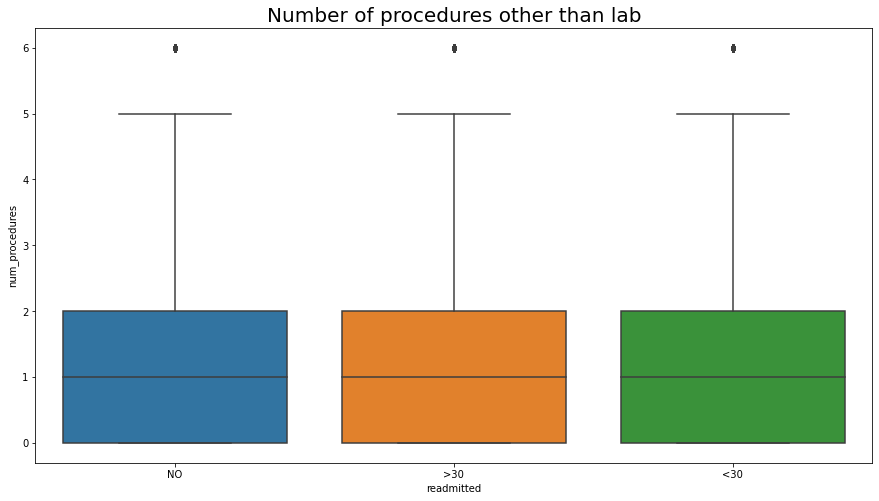

In [53]:

sns.boxplot(y='num_procedures',x='readmitted',data=dia)
plt.title('Number of procedures other than lab',fontsize=20)
plt.show()

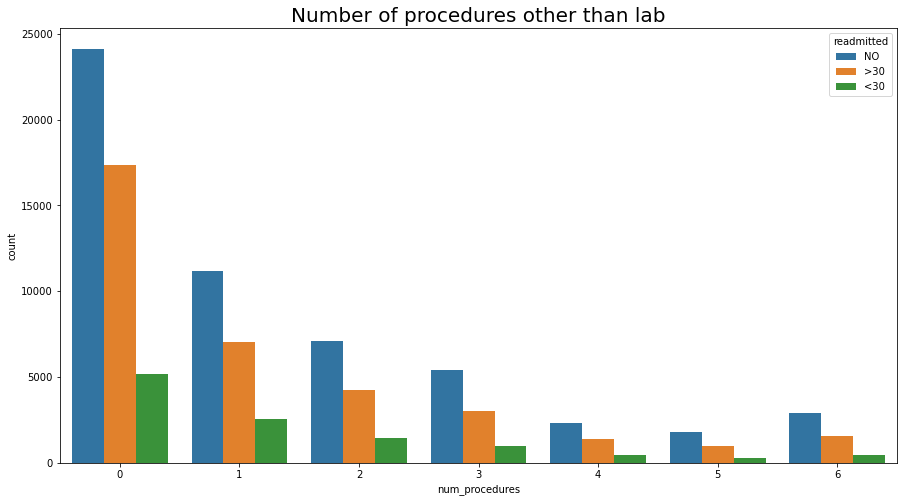

In [54]:
sns.countplot(x='num_procedures',hue='readmitted',data=dia)
plt.title('Number of procedures other than lab',fontsize=20)
plt.show()

### Number of medications

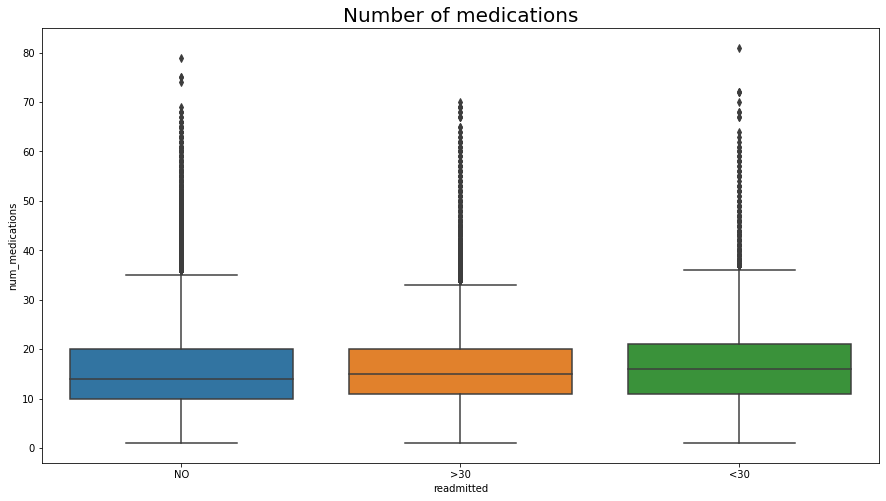

In [55]:

sns.boxplot(y='num_medications',x='readmitted',data=dia)
plt.title('Number of medications',fontsize=20)
plt.show()

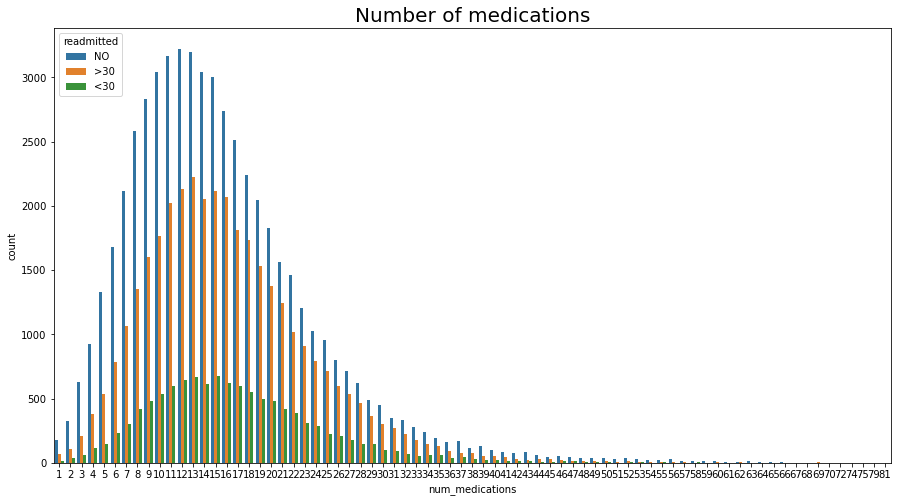

In [56]:
sns.countplot(x='num_medications',hue='readmitted',data=dia)
plt.title('Number of medications',fontsize=20)
plt.show()

### Number of emergency visits

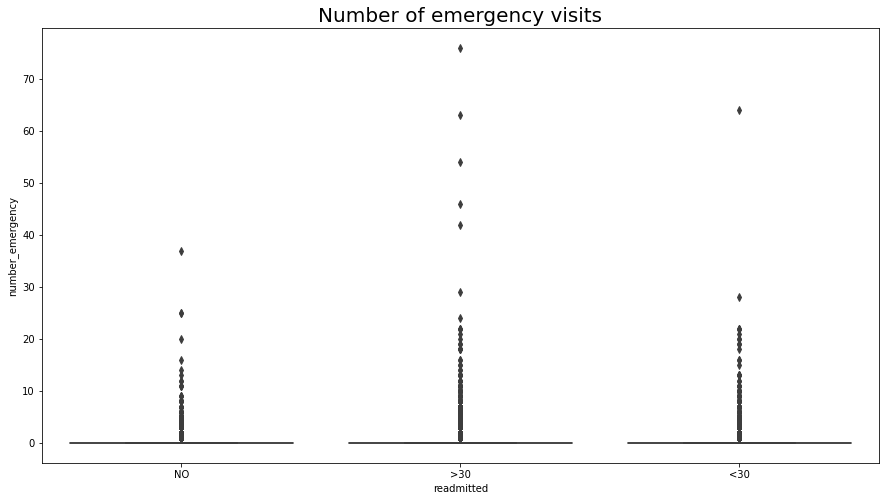

In [57]:
sns.boxplot(y='number_emergency',x='readmitted',data=dia)
plt.title('Number of emergency visits',fontsize=20)
plt.show()

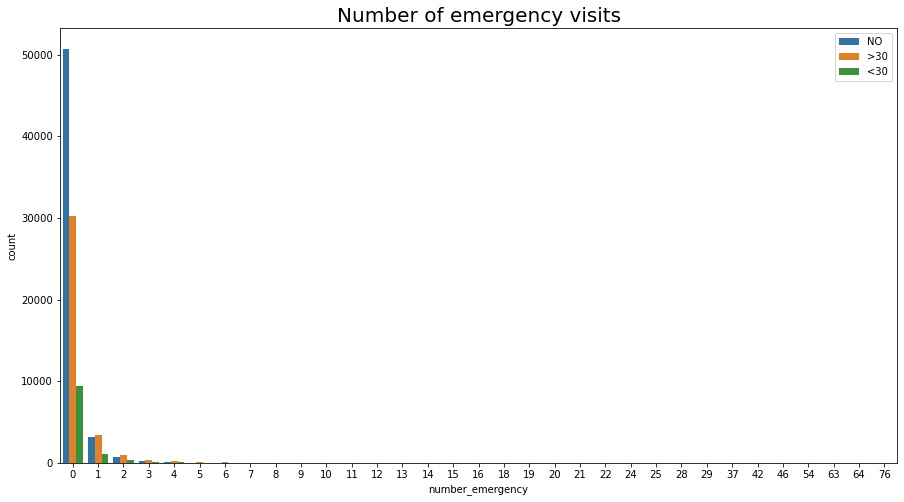

In [58]:
sns.countplot(x='number_emergency',hue='readmitted',data=dia)
plt.title('Number of emergency visits',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Number of inpatient visits


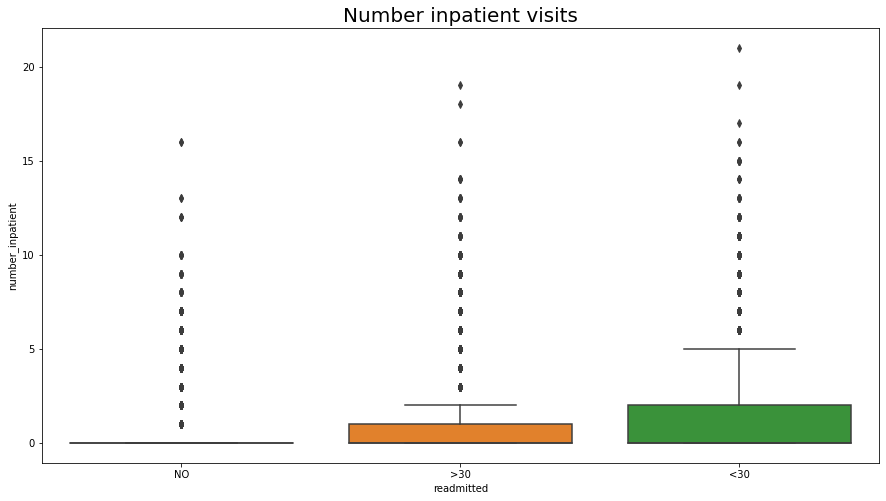

In [59]:
sns.boxplot(y='number_inpatient',x='readmitted',data=dia)
plt.title('Number inpatient visits',fontsize=20)
plt.show()

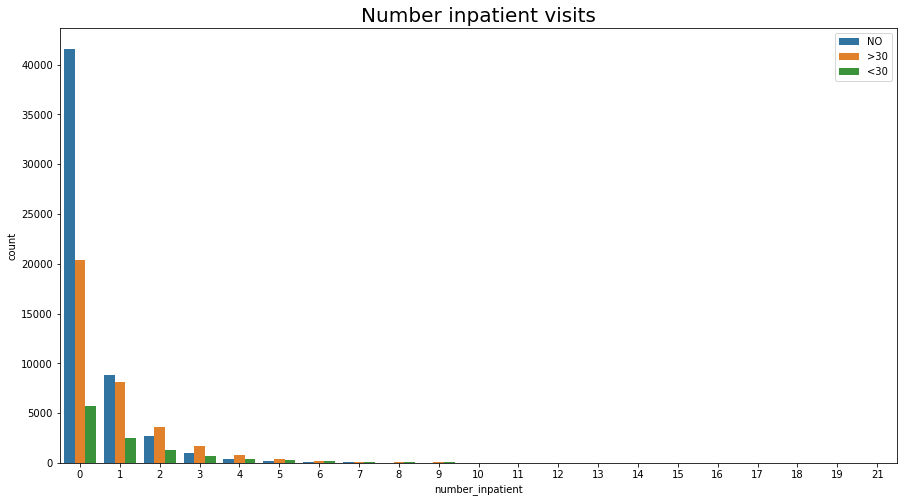

In [60]:
sns.countplot(x='number_inpatient',hue='readmitted',data=dia)
plt.title('Number inpatient visits',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Number of outpatient

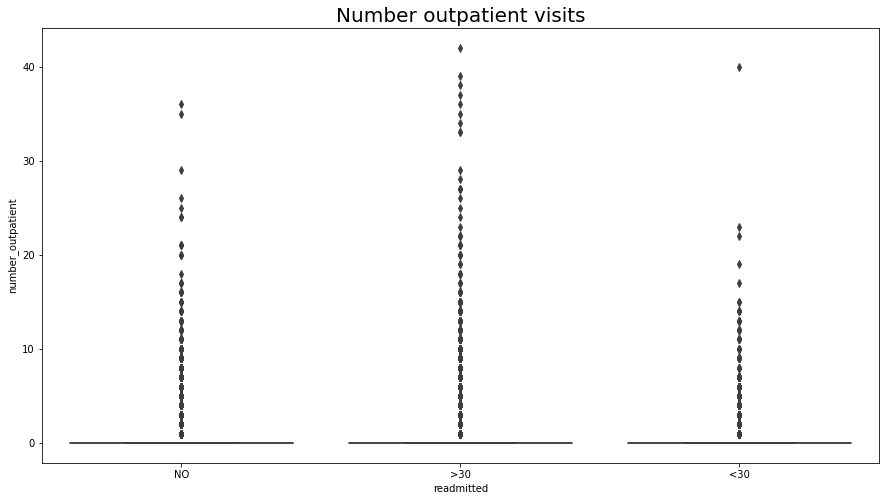

In [61]:
sns.boxplot(y='number_outpatient',x='readmitted',data=dia)
plt.title('Number outpatient visits',fontsize=20)
plt.show()

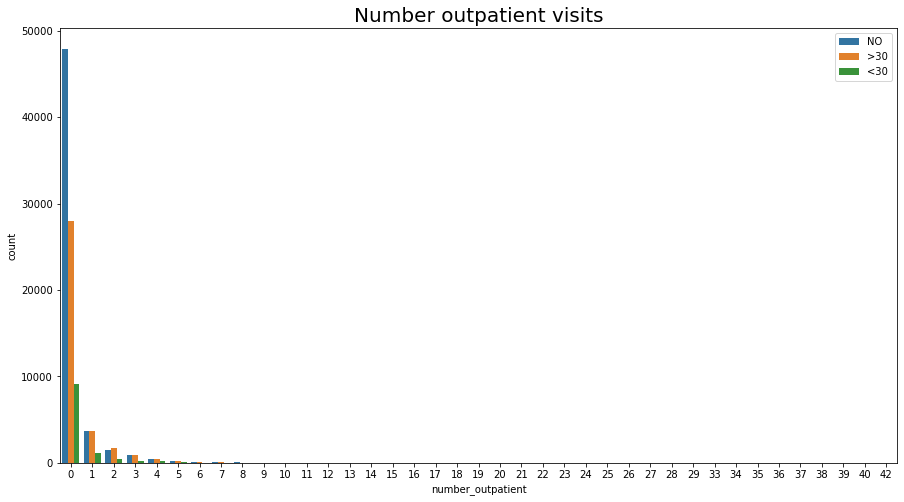

In [62]:
sns.countplot(x='number_outpatient',hue='readmitted',data=dia)
plt.title('Number outpatient visits',fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Number of dignoses entered in system

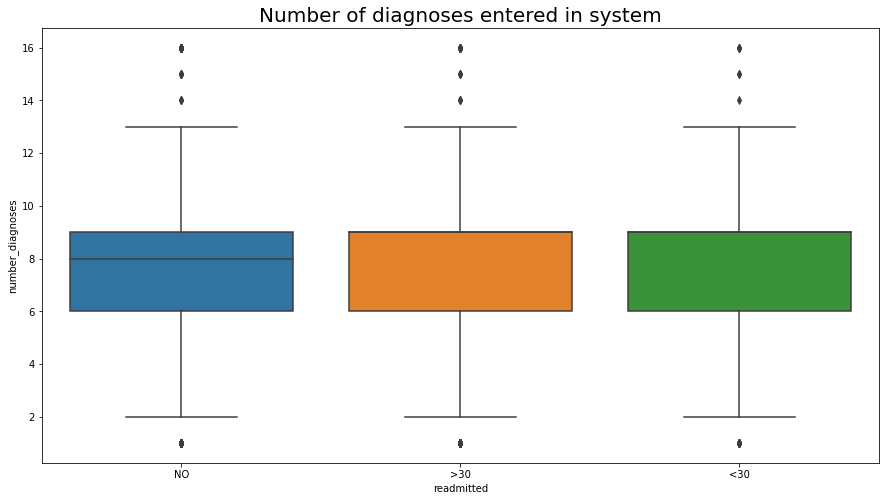

In [63]:
sns.boxplot(y='number_diagnoses',x='readmitted',data=dia)
plt.title('Number of diagnoses entered in system',fontsize=20)
plt.show()

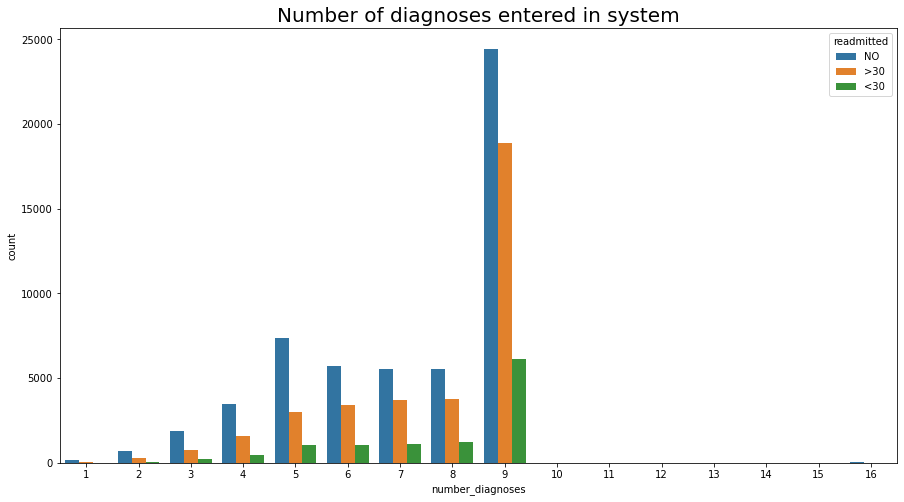

In [64]:
sns.countplot(x='number_diagnoses',hue='readmitted',data=dia)
plt.title('Number of diagnoses entered in system',fontsize=20)
plt.show()

### Analysis of the feature Change and our target feature.

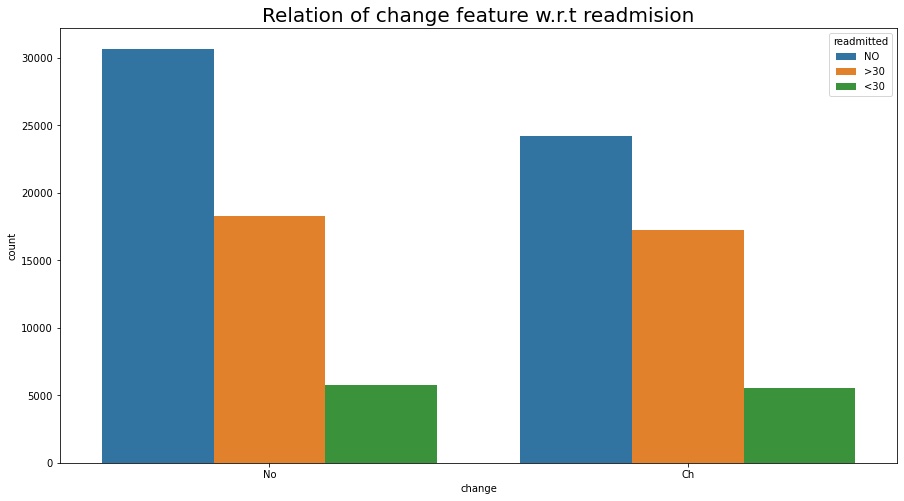

In [65]:
sns.countplot(x=dia['change'],hue=dia['readmitted'])
plt.title('Relation of change feature w.r.t readmision', fontsize=20)
plt.show()

### Analysis of the feature Diabetic medication and our target feature.

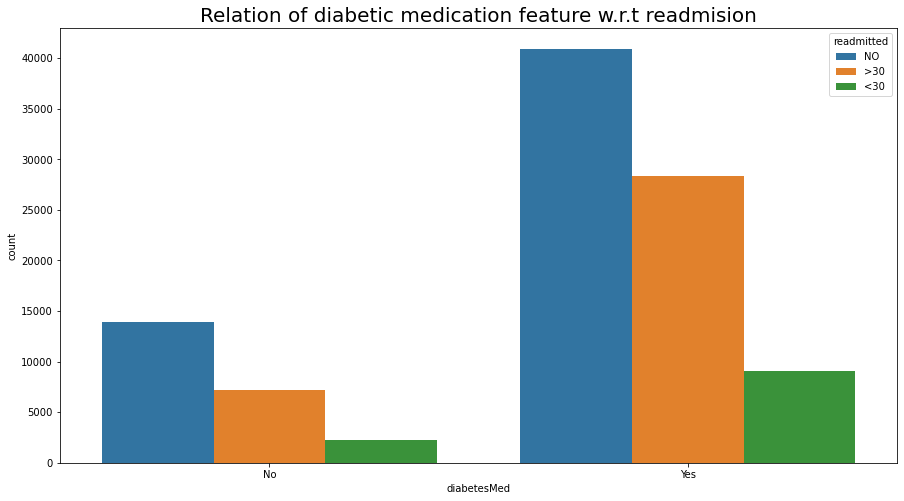

In [66]:
sns.countplot(x=dia['diabetesMed'],hue=dia['readmitted'])
plt.title('Relation of diabetic medication feature w.r.t readmision', fontsize=20)
plt.show()

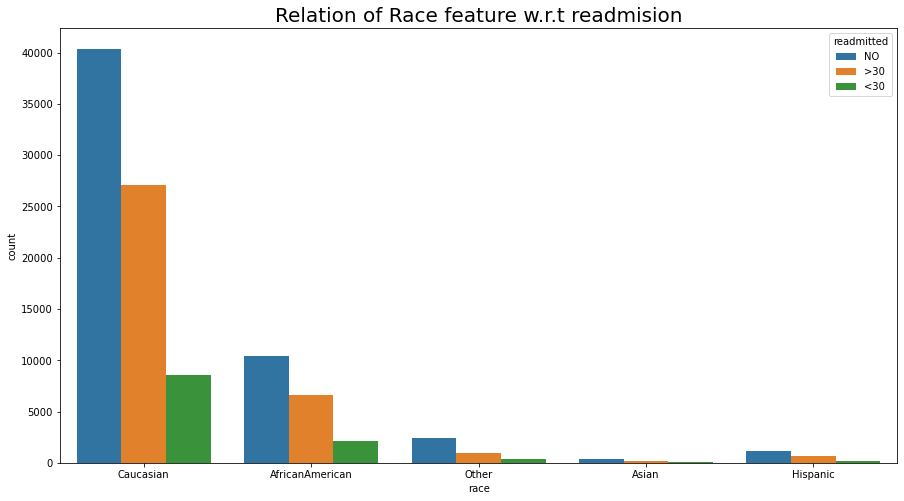

In [67]:
sns.countplot(x='race',hue='readmitted',data=dia)
plt.title('Relation of Race feature w.r.t readmision',fontsize=20)
plt.show()

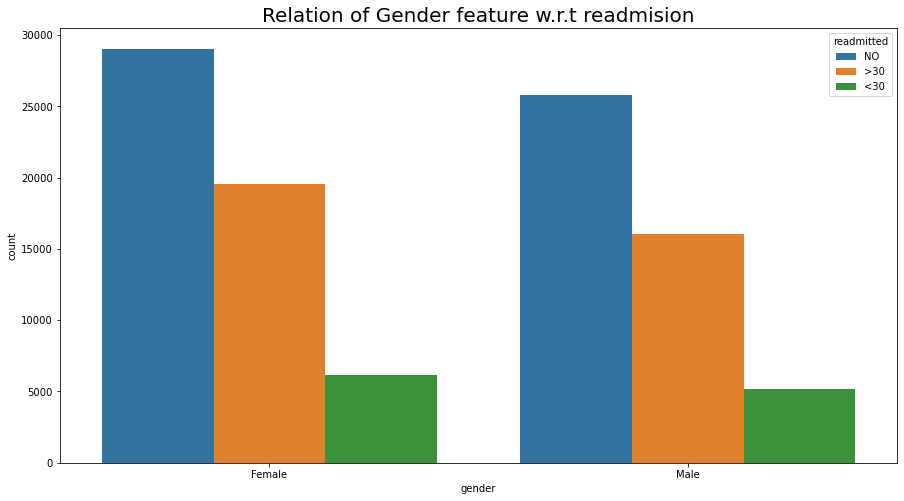

In [68]:
sns.countplot(x='gender',hue='readmitted',data=dia)
plt.title('Relation of Gender feature w.r.t readmision',fontsize=20)
plt.show()

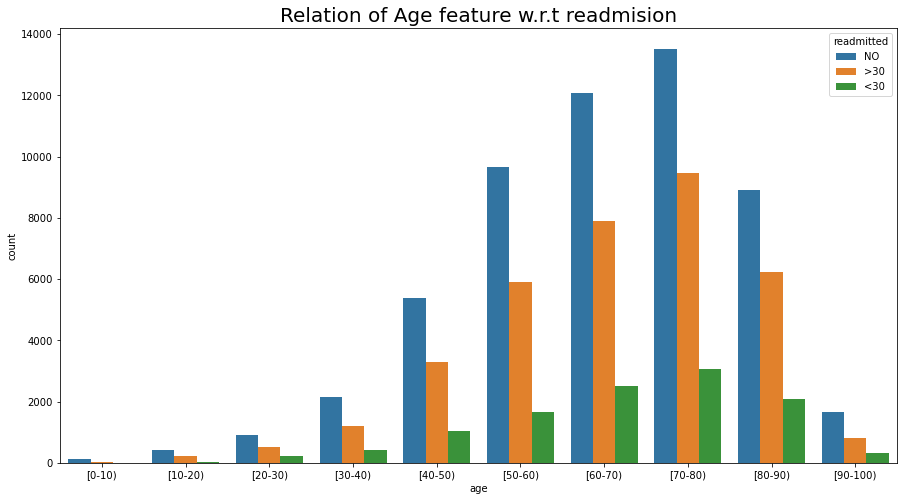

In [69]:
sns.countplot(x='age',hue='readmitted',data=dia)
plt.title('Relation of Age feature w.r.t readmision',fontsize=20)
plt.show()

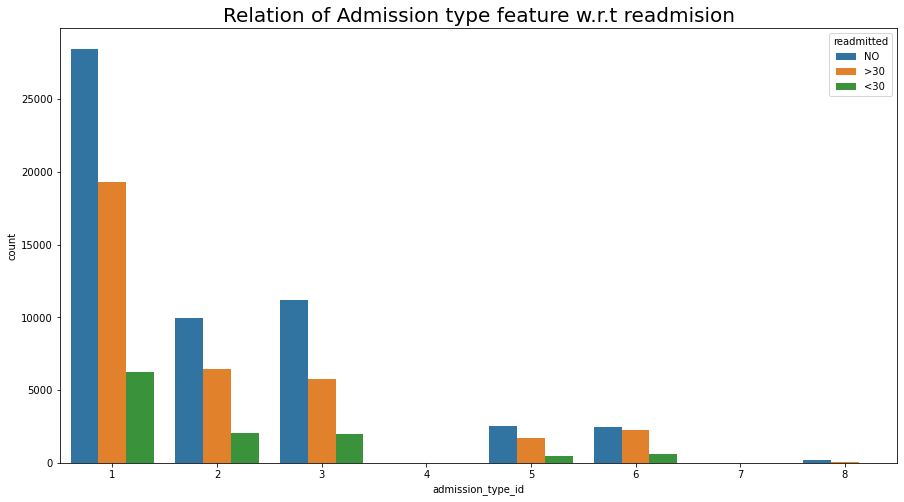

In [70]:
sns.countplot(x='admission_type_id',hue='readmitted',data=dia)
plt.title('Relation of Admission type feature w.r.t readmision',fontsize=20)
plt.show()

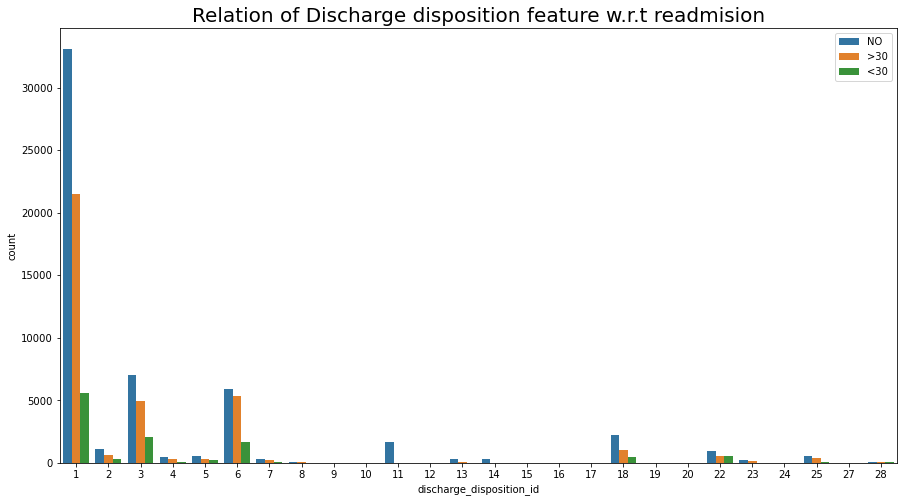

In [71]:
sns.countplot(x='discharge_disposition_id',hue='readmitted',data=dia)
plt.title('Relation of Discharge disposition feature w.r.t readmision',fontsize=20)
plt.legend(loc='upper right')
plt.show()

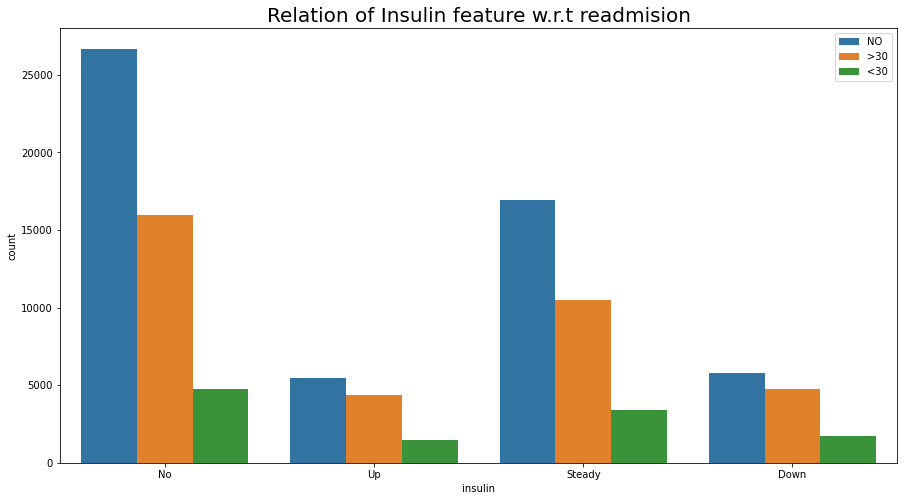

In [72]:
sns.countplot(x='insulin',hue='readmitted',data=dia)
plt.title('Relation of Insulin feature w.r.t readmision',fontsize=20)
plt.legend(loc='upper right')
plt.show()

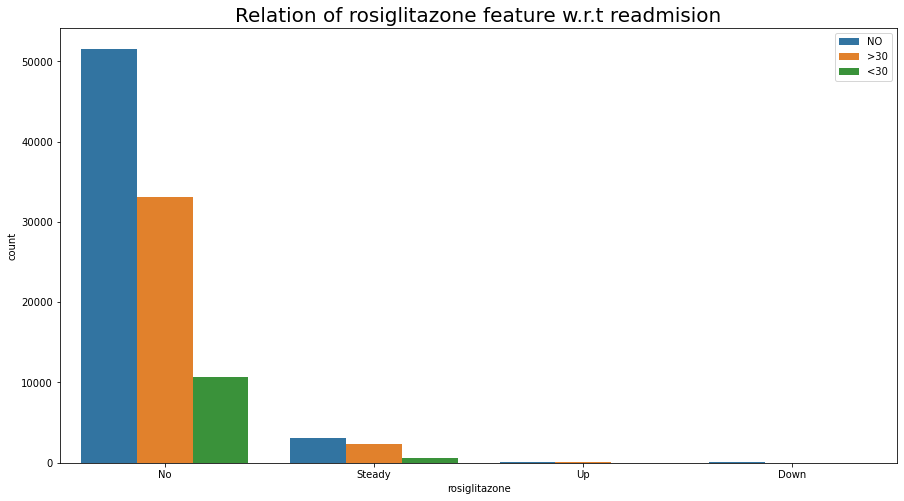

In [73]:
sns.countplot(x='rosiglitazone',hue='readmitted',data=dia)
plt.title('Relation of rosiglitazone feature w.r.t readmision',fontsize=20)
plt.legend(loc='upper right')
plt.show()

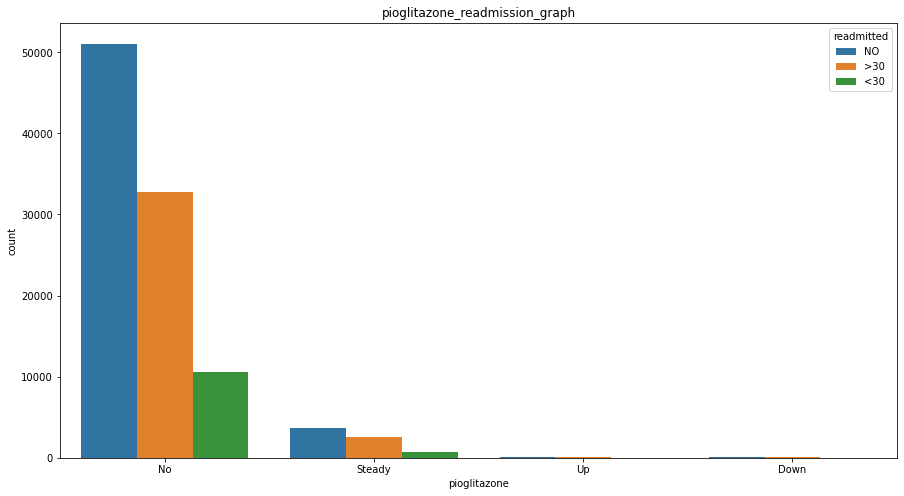

In [74]:
sns.countplot(x='pioglitazone',hue='readmitted',data=dia)
plt.title('pioglitazone_readmission_graph')
plt.show()

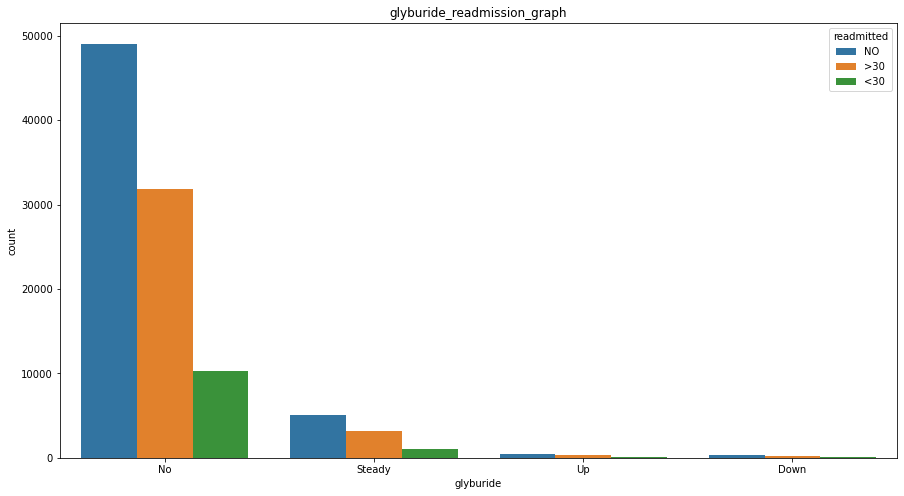

In [75]:
sns.countplot(x='glyburide',hue='readmitted',data=dia)
plt.title('glyburide_readmission_graph')
plt.show()

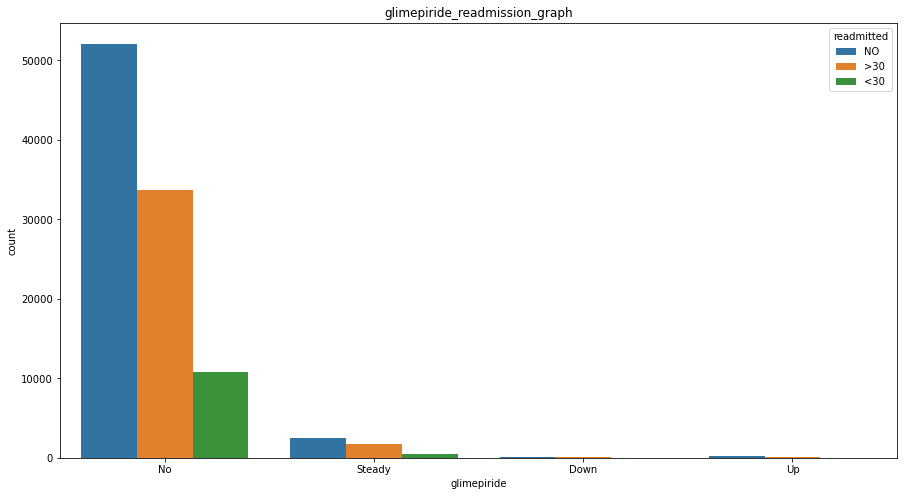

In [76]:
sns.countplot(x='glimepiride',hue='readmitted',data=dia)
plt.title('glimepiride_readmission_graph')
plt.show()

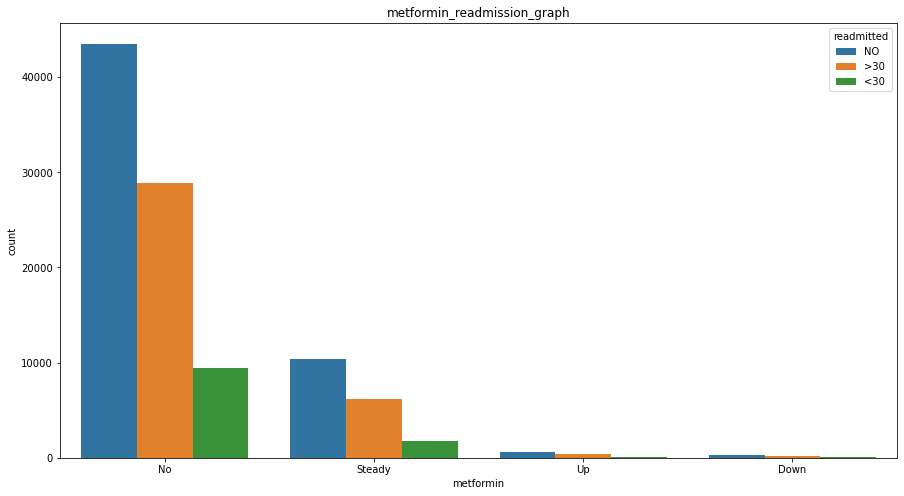

In [77]:
sns.countplot(x='metformin',hue='readmitted',data=dia)
plt.title('metformin_readmission_graph')
plt.show()

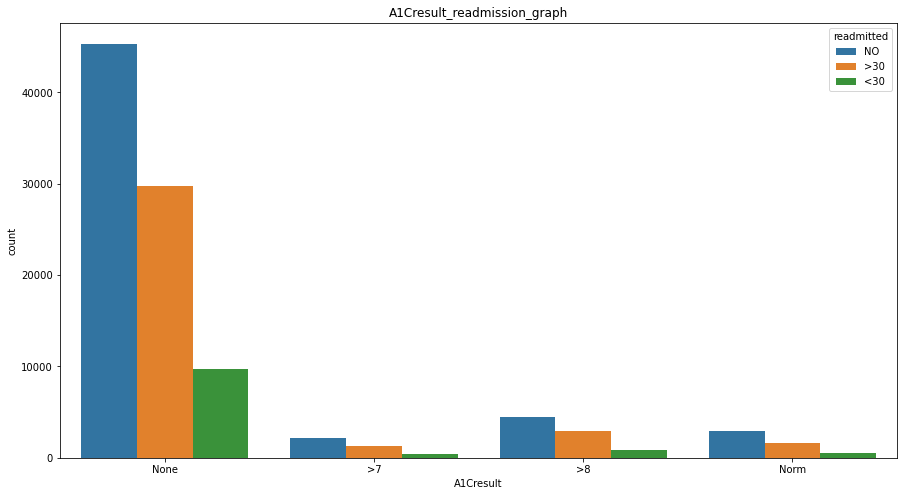

In [78]:
sns.countplot(x='A1Cresult',hue='readmitted',data=dia)
plt.title('A1Cresult_readmission_graph')
plt.show()

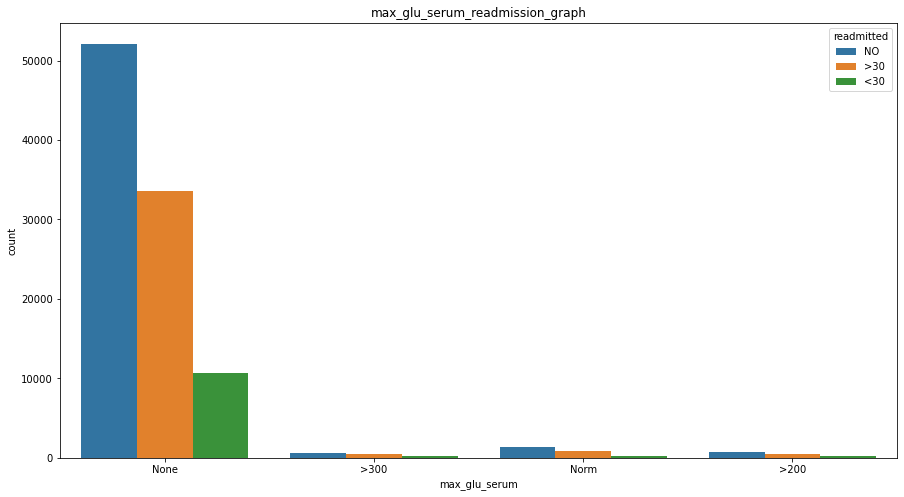

In [79]:
sns.countplot(x='max_glu_serum',hue='readmitted',data=dia)
plt.title('max_glu_serum_readmission_graph')
plt.show()

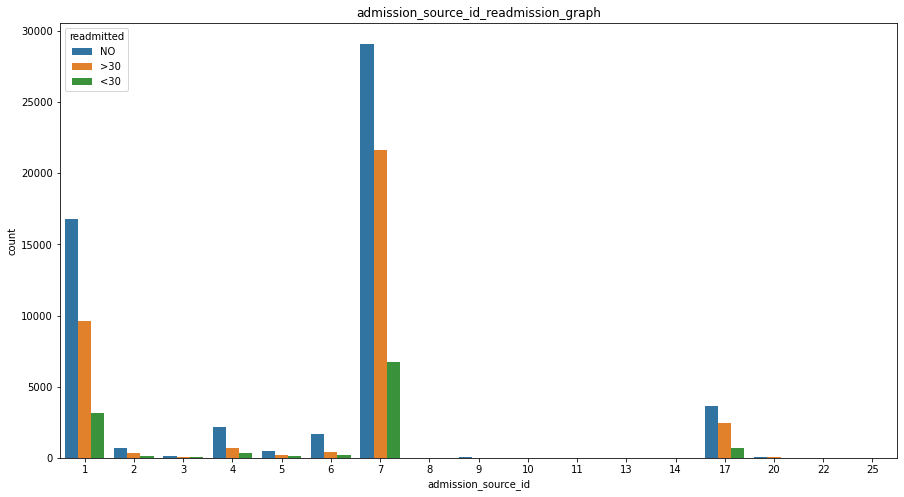

In [80]:
sns.countplot(x='admission_source_id',hue='readmitted',data=dia)
plt.title('admission_source_id_readmission_graph')
plt.show()

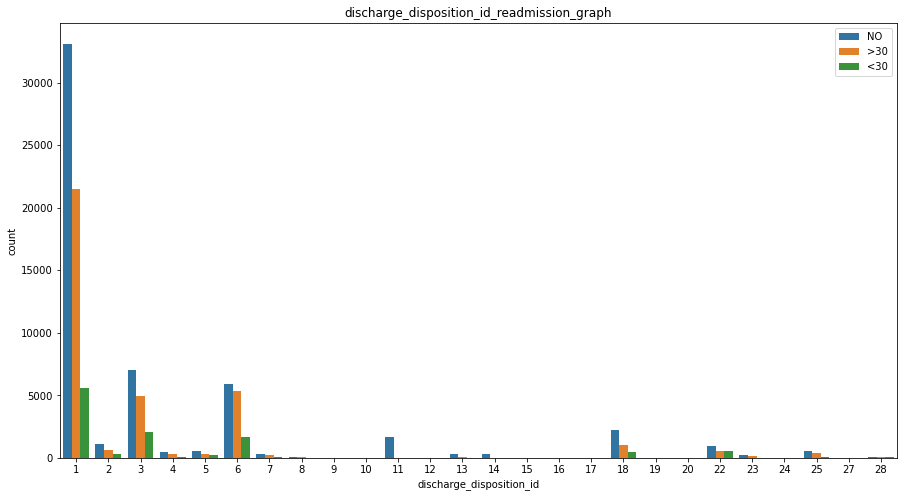

In [81]:
sns.countplot(x='discharge_disposition_id',hue='readmitted',data=dia)
plt.title('discharge_disposition_id_readmission_graph')
plt.legend(loc='upper right')
plt.show()

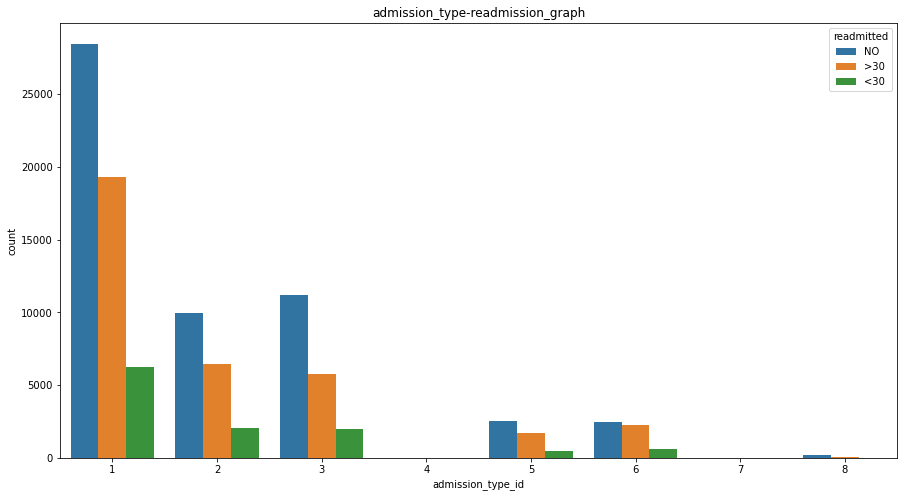

In [82]:
sns.countplot(x='admission_type_id',hue='readmitted',data=dia)
plt.title('admission_type-readmission_graph')
plt.show()

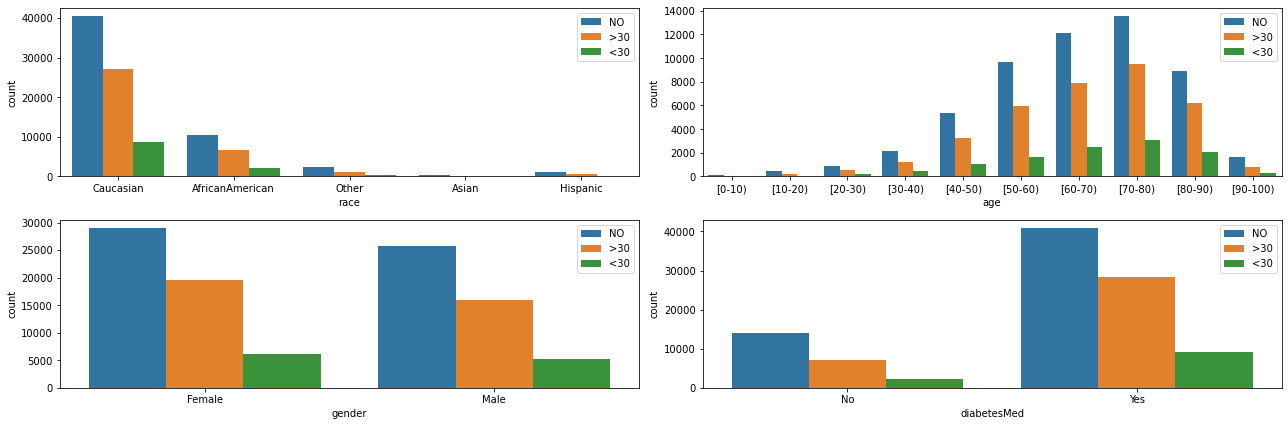

In [83]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
sns.countplot(data=dia, x='race', hue='readmitted',ax=ax1)

sns.countplot(data=dia, x='age', hue='readmitted',ax=ax2)

sns.countplot(data=dia, x='gender', hue='readmitted',ax=ax3)

sns.countplot(data=dia, x='diabetesMed', hue='readmitted',ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()
# readmitted: 0 = No, 1 = >30, 2 = <30

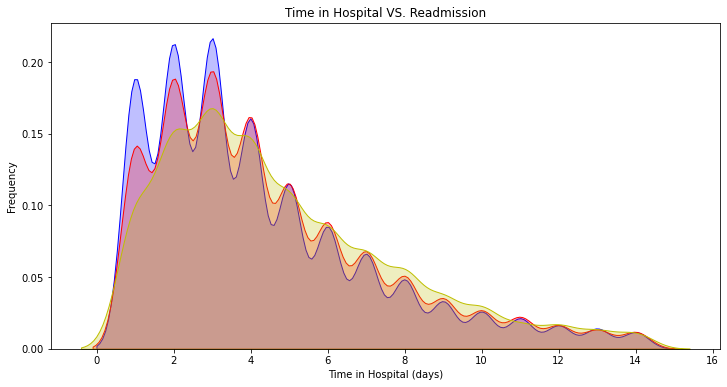

In [85]:
fig = plt.figure(figsize=(12,6))
ax=sns.kdeplot(dia.loc[(dia['readmitted'] == 'NO'),'time_in_hospital'] , color='b',shade=True,label='No readmittion')
ax=sns.kdeplot(dia.loc[(dia['readmitted'] == '>30'),'time_in_hospital'] , color='r',shade=True, label='Readmittion in >30 days')
ax=sns.kdeplot(dia.loc[(dia['readmitted'] == '<30'),'time_in_hospital'] , color='y',shade=True, label='Readmitted in <30 days')
ax.set(xlabel='Time in Hospital (days)', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
plt.show()

# Data Analysis and Feature Engineering:

In [86]:
dia['health_index'] = dia.apply(lambda x:  1 / (x['number_emergency'] + x['number_inpatient'] + x['number_outpatient'])
                                  if x['number_emergency'] != 0 or x['number_inpatient'] != 0 or x['number_outpatient'] != 0
                                  else 1, axis = 1)



total = dia['time_in_hospital'].sum() + dia['num_procedures'].sum() + \
                              dia['num_medications'].sum() + dia['num_lab_procedures'].sum() + \
                              dia['number_diagnoses'].sum()

dia['severity_of_disease'] = (dia['time_in_hospital'] + dia['num_procedures'] + \
                              dia['num_medications'] + dia['num_lab_procedures'] + \
                              dia['number_diagnoses']) / total

drugList = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin']


number_of_changes = []
for i in range(len(dia)) :
    changeCount = 0
    for col in drugList : 
        if dia.iloc[i][col] in ['Down', 'Up'] :
            changeCount += 1
    number_of_changes.append(changeCount)

dia['number_of_changes'] = number_of_changes

KeyboardInterrupt: 

# Discharge Disposiiton ID

In [84]:
dia['discharge_disposition_id'] = dia['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

dia = dia[~dia.discharge_disposition_id.isin([11,13,14,19,20,21])]

# Admission Type ID :

In [85]:
dia['admission_source_id'] = dia['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

# Glucose Serum test

We want to make the following changes: 

|Raw Values|New Values|
|---|---|
|none|0
|norm|1
|>200|2
|>300|3

In [86]:
dia['max_glu_serum']=dia['max_glu_serum'].replace("None", 0)
dia['max_glu_serum']=dia['max_glu_serum'].replace("Norm", 1)
dia['max_glu_serum']=dia['max_glu_serum'].replace(">200", 2)
dia['max_glu_serum']=dia['max_glu_serum'].replace(">300", 3)
dia.max_glu_serum.value_counts()

0    94890
1     2573
2     1440
3     1211
Name: max_glu_serum, dtype: int64

# A1C test :

We want to make the following changes: 

|Raw Values|New Values|
|---|---|
|None|0
|Norm|1
|>7|2
|>8|3

In [87]:
dia['A1Cresult']=dia['A1Cresult'].replace("None", 0)
dia['A1Cresult']=dia['A1Cresult'].replace("Norm", 1)
dia['A1Cresult']=dia['A1Cresult'].replace(">7", 2)
dia['A1Cresult']=dia['A1Cresult'].replace(">8", 3)

# diagnosis feature

In [88]:
#start by setting all values containing E or V into 0 (as one category)
dia.loc[dia['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
dia.loc[dia['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
dia.loc[dia['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
dia.loc[dia['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
dia.loc[dia['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
dia.loc[dia['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0


In [89]:
#No all diag values can be converted into numeric values
dia['diag_1'] = dia['diag_1'].astype(float)
dia['diag_2'] = dia['diag_2'].astype(float)
dia['diag_3'] = dia['diag_3'].astype(float)

In [90]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
dia['diag_1'].loc[(dia['diag_1']>=1) & (dia['diag_1']< 140)] = 1
dia['diag_1'].loc[(dia['diag_1']>=140) & (dia['diag_1']< 240)] = 2
dia['diag_1'].loc[(dia['diag_1']>=240) & (dia['diag_1']< 280)] = 3
dia['diag_1'].loc[(dia['diag_1']>=280) & (dia['diag_1']< 290)] = 4
dia['diag_1'].loc[(dia['diag_1']>=290) & (dia['diag_1']< 320)] = 5
dia['diag_1'].loc[(dia['diag_1']>=320) & (dia['diag_1']< 390)] = 6
dia['diag_1'].loc[(dia['diag_1']>=390) & (dia['diag_1']< 460)] = 7
dia['diag_1'].loc[(dia['diag_1']>=460) & (dia['diag_1']< 520)] = 8
dia['diag_1'].loc[(dia['diag_1']>=520) & (dia['diag_1']< 580)] = 9
dia['diag_1'].loc[(dia['diag_1']>=580) & (dia['diag_1']< 630)] = 10
dia['diag_1'].loc[(dia['diag_1']>=630) & (dia['diag_1']< 680)] = 11
dia['diag_1'].loc[(dia['diag_1']>=680) & (dia['diag_1']< 710)] = 12
dia['diag_1'].loc[(dia['diag_1']>=710) & (dia['diag_1']< 740)] = 13
dia['diag_1'].loc[(dia['diag_1']>=740) & (dia['diag_1']< 760)] = 14
dia['diag_1'].loc[(dia['diag_1']>=760) & (dia['diag_1']< 780)] = 15
dia['diag_1'].loc[(dia['diag_1']>=780) & (dia['diag_1']< 800)] = 16
dia['diag_1'].loc[(dia['diag_1']>=800) & (dia['diag_1']< 1000)] = 17
dia['diag_1'].loc[(dia['diag_1']==-1)] = 0

In [91]:
dia['diag_2'].loc[(dia['diag_2']>=1) & (dia['diag_2']< 140)] = 1
dia['diag_2'].loc[(dia['diag_2']>=140) & (dia['diag_2']< 240)] = 2
dia['diag_2'].loc[(dia['diag_2']>=240) & (dia['diag_2']< 280)] = 3
dia['diag_2'].loc[(dia['diag_2']>=280) & (dia['diag_2']< 290)] = 4
dia['diag_2'].loc[(dia['diag_2']>=290) & (dia['diag_2']< 320)] = 5
dia['diag_2'].loc[(dia['diag_2']>=320) & (dia['diag_2']< 390)] = 6
dia['diag_2'].loc[(dia['diag_2']>=390) & (dia['diag_2']< 460)] = 7
dia['diag_2'].loc[(dia['diag_2']>=460) & (dia['diag_2']< 520)] = 8
dia['diag_2'].loc[(dia['diag_2']>=520) & (dia['diag_2']< 580)] = 9
dia['diag_2'].loc[(dia['diag_2']>=580) & (dia['diag_2']< 630)] = 10
dia['diag_2'].loc[(dia['diag_2']>=630) & (dia['diag_2']< 680)] = 11
dia['diag_2'].loc[(dia['diag_2']>=680) & (dia['diag_2']< 710)] = 12
dia['diag_2'].loc[(dia['diag_2']>=710) & (dia['diag_2']< 740)] = 13
dia['diag_2'].loc[(dia['diag_2']>=740) & (dia['diag_2']< 760)] = 14
dia['diag_2'].loc[(dia['diag_2']>=760) & (dia['diag_2']< 780)] = 15
dia['diag_2'].loc[(dia['diag_2']>=780) & (dia['diag_2']< 800)] = 16
dia['diag_2'].loc[(dia['diag_2']>=800) & (dia['diag_2']< 1000)] = 17
dia['diag_2'].loc[(dia['diag_2']==-1)] = 0

In [92]:
dia['diag_3'].loc[(dia['diag_3']>=1) & (dia['diag_3']< 140)] = 1
dia['diag_3'].loc[(dia['diag_3']>=140) & (dia['diag_3']< 240)] = 2
dia['diag_3'].loc[(dia['diag_3']>=240) & (dia['diag_3']< 280)] = 3
dia['diag_3'].loc[(dia['diag_3']>=280) & (dia['diag_3']< 290)] = 4
dia['diag_3'].loc[(dia['diag_3']>=290) & (dia['diag_3']< 320)] = 5
dia['diag_3'].loc[(dia['diag_3']>=320) & (dia['diag_3']< 390)] = 6
dia['diag_3'].loc[(dia['diag_3']>=390) & (dia['diag_3']< 460)] = 7
dia['diag_3'].loc[(dia['diag_3']>=460) & (dia['diag_3']< 520)] = 8
dia['diag_3'].loc[(dia['diag_3']>=520) & (dia['diag_3']< 580)] = 9
dia['diag_3'].loc[(dia['diag_3']>=580) & (dia['diag_3']< 630)] = 10
dia['diag_3'].loc[(dia['diag_3']>=630) & (dia['diag_3']< 680)] = 11
dia['diag_3'].loc[(dia['diag_3']>=680) & (dia['diag_3']< 710)] = 12
dia['diag_3'].loc[(dia['diag_3']>=710) & (dia['diag_3']< 740)] = 13
dia['diag_3'].loc[(dia['diag_3']>=740) & (dia['diag_3']< 760)] = 14
dia['diag_3'].loc[(dia['diag_3']>=760) & (dia['diag_3']< 780)] = 15
dia['diag_3'].loc[(dia['diag_3']>=780) & (dia['diag_3']< 800)] = 16
dia['diag_3'].loc[(dia['diag_3']>=800) & (dia['diag_3']< 1000)] = 17
dia['diag_3'].loc[(dia['diag_3']==-1)] = 0

In [93]:
#check the results
dia.diag_1.unique()

array([ 3., 11.,  1.,  2.,  7.,  8., 17., 12., 13.,  9.,  0., 16., 10.,
        5.,  6.,  4., 14.])

# Race Feature 

In [94]:
dia['race'].value_counts()

Caucasian          74845
AfricanAmerican    18888
Other               3725
Hispanic            2024
Asian                632
Name: race, dtype: int64

# Gender Feature

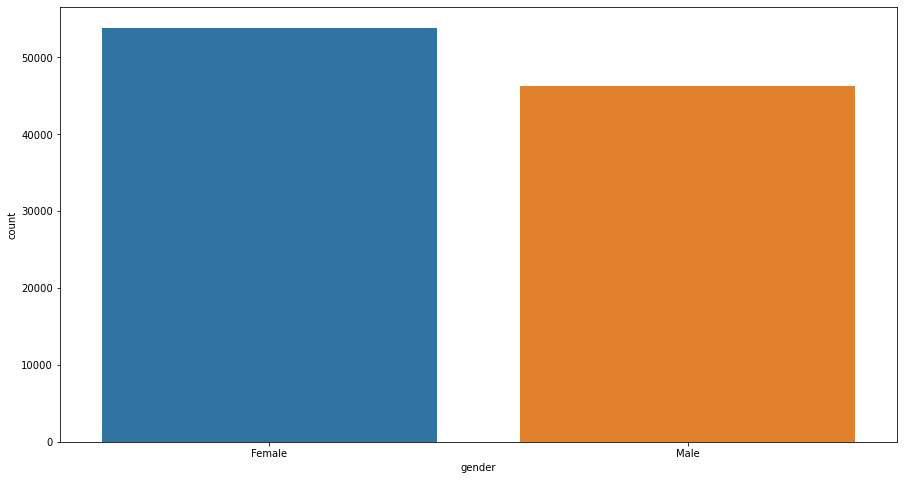

In [95]:
sns.countplot(dia.gender)
plt.show()

In [96]:
dia['gender'] = dia['gender'].replace('Male', 1)
dia['gender'] = dia['gender'].replace('Female', 0)
dia.gender.value_counts()

0    53864
1    46250
Name: gender, dtype: int64

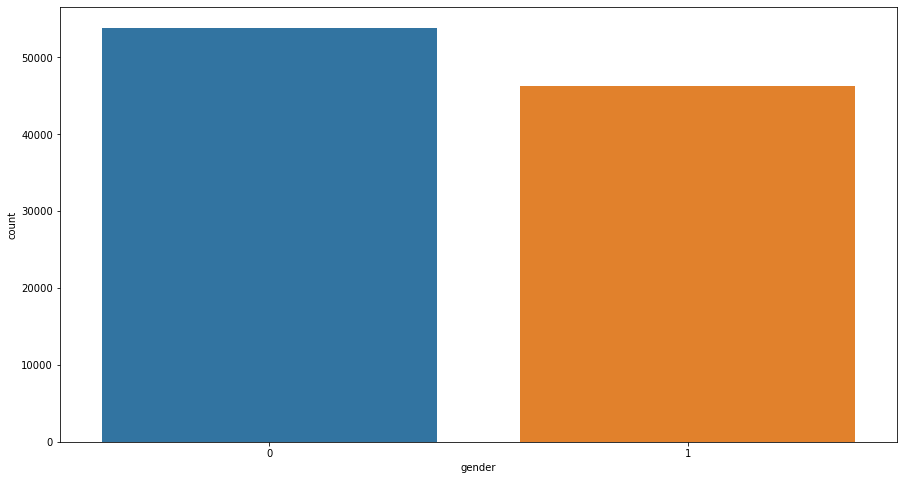

In [97]:
sns.countplot(dia.gender)
plt.show()

### male is coded as 1 and female is coded as 0

# Drugs Features

We still have 7 features, each one represents the change in the patient's dusage of a specific drug, during hospital encounter. Those 7 drugs are the following: 
* metformin                 
*  glimepiride              
*  glipizide              
*  glyburide                
*  pioglitazone             
*  rosiglitazone          
*  insulin     



In [98]:
print('\n',dia.metformin.value_counts(),
'\n',dia.glimepiride.value_counts(),'\n',
'\n',dia.glipizide.value_counts(),'\n',
'\n',dia.glyburide.value_counts(),'\n',
'\n',dia.pioglitazone.value_counts(),'\n',
'\n',dia.rosiglitazone.value_counts(),'\n',
'\n',dia.insulin.value_counts(),'\n',)


 No        80216
Steady    18256
Up         1067
Down        575
Name: metformin, dtype: int64 
 No        94967
Steady     4630
Up          324
Down        193
Name: glimepiride, dtype: int64 
 
 No        87509
Steady    11284
Up          767
Down        554
Name: glipizide, dtype: int64 
 
 No        89547
Steady     9200
Up          806
Down        561
Name: glyburide, dtype: int64 
 
 No        92833
Steady     6934
Up          230
Down        117
Name: pioglitazone, dtype: int64 
 
 No        93785
Steady     6070
Up          173
Down         86
Name: rosiglitazone, dtype: int64 
 
 No        46680
Steady    30331
Down      12012
Up        11091
Name: insulin, dtype: int64 



In [99]:
drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
for i in drug_list:
    dia[i] = dia[i].replace('No', 0)
    dia[i] = dia[i].replace('Steady', 2)
    dia[i] = dia[i].replace('Down', 1)
    dia[i] = dia[i].replace('Up', 3)

In [100]:
print('\n',dia.metformin.value_counts(),'\n',
'\n',dia.glimepiride.value_counts(),'\n',
'\n',dia.glipizide.value_counts(),'\n',
'\n',dia.glyburide.value_counts(),'\n',
'\n',dia.pioglitazone.value_counts(),'\n',
'\n',dia.rosiglitazone.value_counts(),'\n',
'\n',dia.insulin.value_counts(),'\n')


 0    80216
2    18256
3     1067
1      575
Name: metformin, dtype: int64 
 
 0    94967
2     4630
3      324
1      193
Name: glimepiride, dtype: int64 
 
 0    87509
2    11284
3      767
1      554
Name: glipizide, dtype: int64 
 
 0    89547
2     9200
3      806
1      561
Name: glyburide, dtype: int64 
 
 0    92833
2     6934
3      230
1      117
Name: pioglitazone, dtype: int64 
 
 0    93785
2     6070
3      173
1       86
Name: rosiglitazone, dtype: int64 
 
 0    46680
2    30331
1    12012
3    11091
Name: insulin, dtype: int64 



# Change Feature 

In [101]:
dia['change'].value_counts()

No    53671
Ch    46443
Name: change, dtype: int64

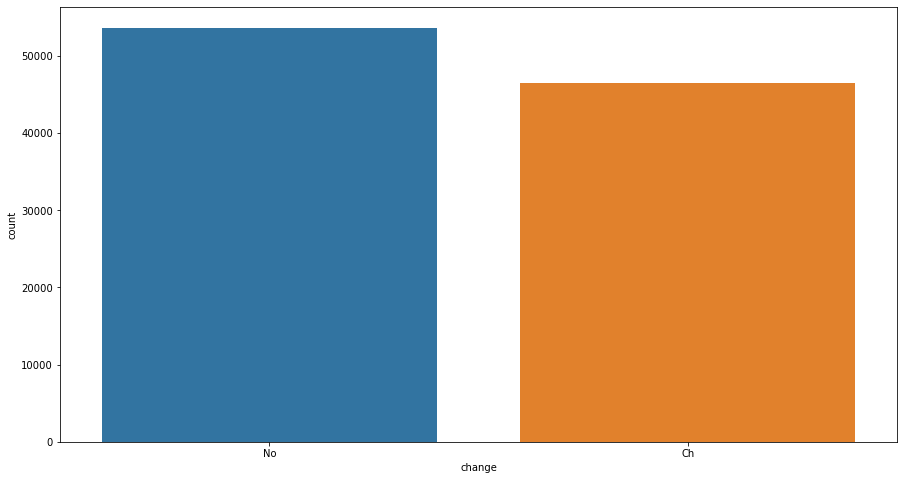

In [102]:
sns.countplot(dia['change'])
plt.show()

In [103]:
dia['change']=dia['change'].replace('No', 0)
dia['change']=dia['change'].replace('Ch', 1)
dia.change.value_counts()

0    53671
1    46443
Name: change, dtype: int64

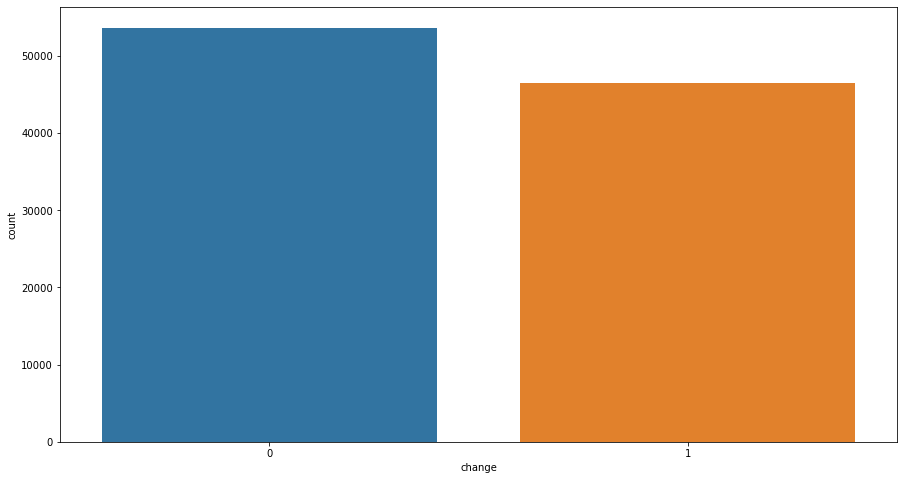

In [104]:
sns.countplot(dia['change'])
plt.show()

# DiabetesMed Feature 

In [105]:
dia['diabetesMed'].value_counts()

Yes    77272
No     22842
Name: diabetesMed, dtype: int64

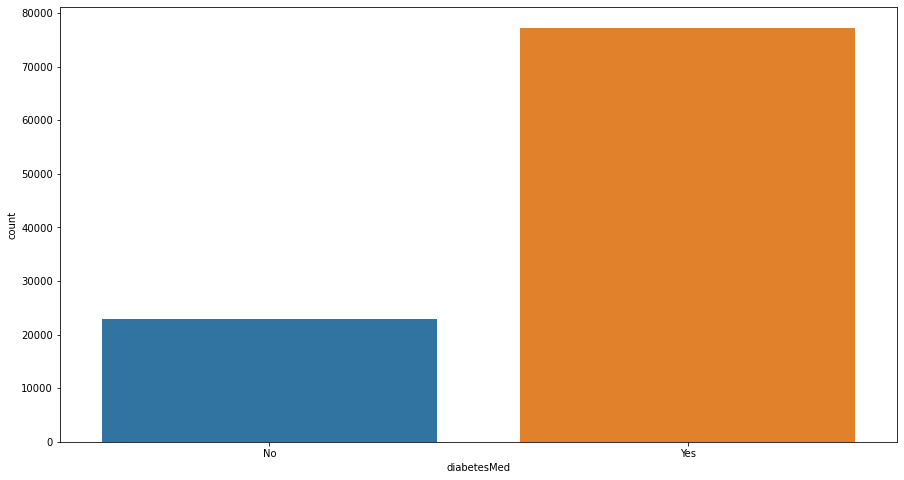

In [106]:
sns.countplot(dia['diabetesMed'])
plt.show()

In [107]:
dia['diabetesMed']=dia['diabetesMed'].replace('Yes', 1)
dia['diabetesMed']=dia['diabetesMed'].replace('No', 0)
dia.diabetesMed.value_counts()

1    77272
0    22842
Name: diabetesMed, dtype: int64

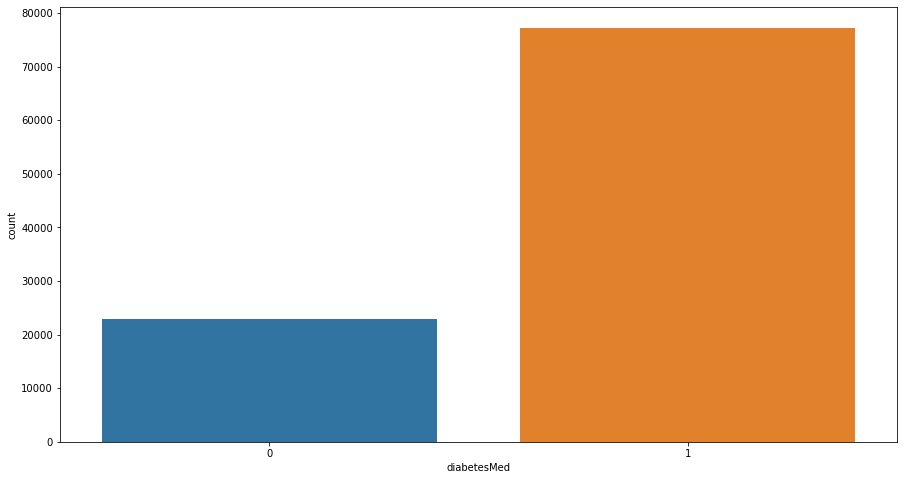

In [108]:
sns.countplot(dia['diabetesMed'])
plt.show()

# Target Feature

In [109]:
dia['readmitted'].value_counts()

NO     53212
>30    35545
<30    11357
Name: readmitted, dtype: int64

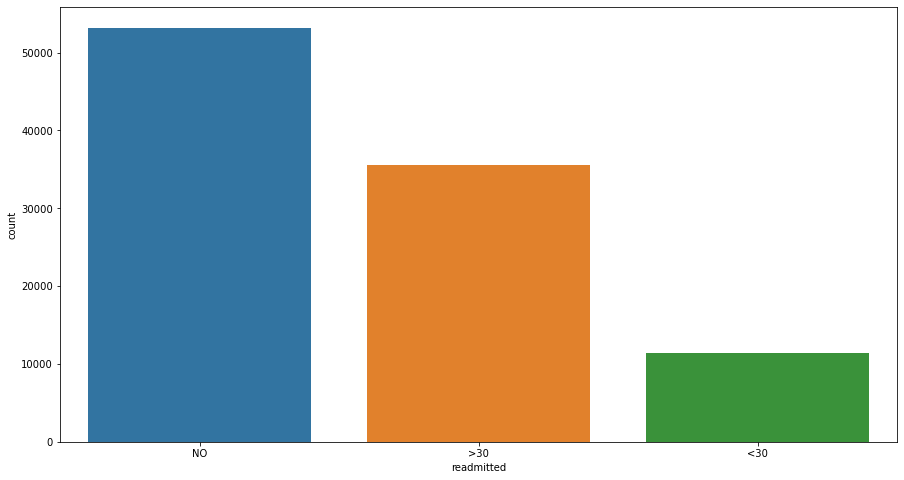

In [110]:
sns.countplot(dia['readmitted'])
plt.show()

In [111]:
print('BEFORE : ',np.unique(dia['readmitted'].values))

dia['readmitted'] = dia['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)

print('AFTER : ',np.unique(dia['readmitted'].values))

BEFORE :  ['<30' '>30' 'NO']
AFTER :  [0 1]


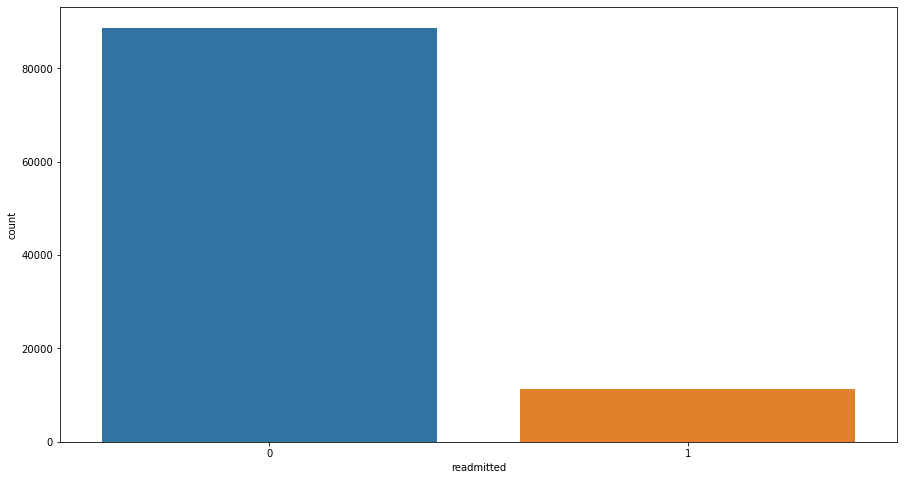

In [112]:
sns.countplot(dia['readmitted'])
plt.show()

In [113]:
dia['readmitted'].value_counts()

0    88757
1    11357
Name: readmitted, dtype: int64

In [114]:
dia.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,0,[0-10),6,18,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Caucasian,0,[10-20),1,1,7,3,59,0,18,...,0,0,0,0,0,0,3,1,1,0
2,AfricanAmerican,0,[20-30),1,1,7,2,11,5,13,...,0,0,2,0,0,0,0,0,1,0
3,Caucasian,1,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,3,1,1,0
4,Caucasian,1,[40-50),1,1,7,1,51,0,8,...,0,0,2,0,0,0,2,1,1,0


# Data Processing for Model

In [115]:
df_dummies=dia.select_dtypes(include='object')
df_dummies=pd.get_dummies(df_dummies,drop_first=True)
df_dummies

,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,0,0,0,0,0,0,1,0,0
101762,0,0,0,0,0,0,0,0,0,0,0,1,0
101763,0,1,0,0,0,0,0,0,0,0,1,0,0
101764,0,1,0,0,0,0,0,0,0,0,0,1,0


In [116]:
df_num=dia.select_dtypes(include=np.number)
df_num

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,0,6,18,1,1,41,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,7,3,59,0,18,0,0,...,0,0,0,0,0,0,3,1,1,0
2,0,1,1,7,2,11,5,13,2,0,...,0,0,2,0,0,0,0,0,1,0
3,1,1,1,7,2,44,1,16,0,0,...,0,0,0,0,0,0,3,1,1,0
4,1,1,1,7,1,51,0,8,0,0,...,0,0,2,0,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,2,7,3,51,0,16,0,0,...,2,0,0,0,0,0,1,1,1,0
101762,0,1,2,4,5,33,3,18,0,0,...,0,0,0,0,0,0,2,0,1,0
101763,1,1,1,7,1,53,0,9,1,0,...,2,0,0,0,0,0,1,1,1,0
101764,0,2,2,7,10,45,2,21,0,0,...,0,0,2,0,2,0,3,1,1,0


In [117]:
df_final=pd.concat([df_num,df_dummies],axis=1)

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc=StandardScaler()
data_scaled=sc.fit_transform(df_final.drop('readmitted',axis=1))
data_scaled=pd.DataFrame(data_scaled,columns=df_final.drop('readmitted',axis=1).columns)

In [120]:
X=data_scaled
y=df_final['readmitted']

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,stratify=y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70079, 39), (30035, 39), (70079,), (30035,))

# Different ML Algos :

In [122]:
lr=LogisticRegression()

In [123]:
modellr=lr.fit(X_train,y_train)
predtrain=modellr.predict(X_train)
predtest=modellr.predict(X_test)


In [124]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import precision_score,recall_score,roc_auc_score,f1_score

In [125]:
precisiontrain=precision_score(y_train,predtrain)


precisiontest=precision_score(y_test,predtest)

recalltrain=recall_score(y_train,predtrain)

recalltest=recall_score(y_test,predtest)

f1_scoretrain=2*precisiontrain*recalltrain/(precisiontrain+recalltrain)


f1_scoretest=2*precisiontest*recalltest/(precisiontest+recalltest)


In [126]:
print(classification_report(y_train,predtrain))

confusion_matrix(y_train,predtrain)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     62129
           1       0.49      0.01      0.03      7950

    accuracy                           0.89     70079
   macro avg       0.69      0.51      0.48     70079
weighted avg       0.84      0.89      0.84     70079



array([[62010,   119],
       [ 7834,   116]], dtype=int64)

In [127]:
print(classification_report(y_test,predtest))

confusion_matrix(y_test,predtest)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26628
           1       0.52      0.02      0.03      3407

    accuracy                           0.89     30035
   macro avg       0.70      0.51      0.49     30035
weighted avg       0.85      0.89      0.84     30035



array([[26577,    51],
       [ 3352,    55]], dtype=int64)

In [128]:
model_all=[modellr]

In [129]:
model_scores = { "Model Name" : [],
                "Accuracy score train" : [],
               "Precision_score train" : [],
               "Recall_Score train" : [],
               "Roc_AUC_Score train" : [],
                "F1-Score Train" : [],
               "Accuracy score test" : [],
               "Precision_score test" : [],
               "Recall_Score test" : [],
               "Roc_AUC_Score test" : [],
               "F1-Score test" : []}




for model in model_all:
    
    model_scores['Model Name'].append(str(model))
    
    model_scores['Accuracy score train'].append(model.score(X_train,y_train))
    pred_tr = model.predict(X_train) 
    model_scores['Precision_score train'].append(precision_score(y_train,pred_tr))
    model_scores['Recall_Score train'].append(recall_score(y_train,pred_tr))
    model_scores['Roc_AUC_Score train'].append(roc_auc_score(y_train,pred_tr))
    model_scores['F1-Score Train'].append(f1_score(y_train,pred_tr))
    
    
    model_scores['Accuracy score test'].append(model.score(X_test,y_test))
    pred_ts = model.predict(X_test) 
    model_scores['Precision_score test'].append(precision_score(y_test,pred_ts))
    model_scores['Recall_Score test'].append(recall_score(y_test,pred_ts))
    model_scores['Roc_AUC_Score test'].append(roc_auc_score(y_test,pred_ts))
    model_scores['F1-Score test'].append(f1_score(y_test,pred_ts))

In [130]:
scores_df=pd.DataFrame(model_scores)

In [131]:
scores_df

,Model Name,Accuracy score train,Precision_score train,Recall_Score train,Roc_AUC_Score train,F1-Score Train,Accuracy score test,Precision_score test,Recall_Score test,Roc_AUC_Score test,F1-Score test
0,LogisticRegression(),0.886514,0.493617,0.014591,0.506338,0.028345,0.886699,0.518868,0.016143,0.507114,0.031312


# Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [133]:
#build
dt_clf=tree.DecisionTreeClassifier(max_depth=5)

In [134]:
#train
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [135]:
y_pred = dt_clf.predict(X_test)


confusion_matrix(y_test,y_pred)

array([[26593,    35],
       [ 3362,    45]], dtype=int64)

In [136]:

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

 


In [137]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [138]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [139]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [140]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62129
           1       1.00      1.00      1.00      7950

    accuracy                           1.00     70079
   macro avg       1.00      1.00      1.00     70079
weighted avg       1.00      1.00      1.00     70079



In [141]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     26628
           1       0.16      0.18      0.17      3407

    accuracy                           0.80     30035
   macro avg       0.52      0.53      0.53     30035
weighted avg       0.81      0.80      0.80     30035



In [142]:
test_report

'              precision    recall  f1-score   support\n\n           0       0.89      0.88      0.88     26628\n           1       0.16      0.18      0.17      3407\n\n    accuracy                           0.80     30035\n   macro avg       0.52      0.53      0.53     30035\nweighted avg       0.81      0.80      0.80     30035\n'

In [143]:
#make prediction 
dt_clf.score(X_test,y_test)

y_pred = dt_clf.predict(X_test)
dt_clf.score(X_test,y_test)

0.8868986182786749

In [144]:

dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

decision_tree = dt_model.fit(X_train, y_train)

train_report = get_train_report(decision_tree)

print('Train data:\n', train_report)

test_report = get_test_report(decision_tree)

print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     62129
           1       0.00      0.00      0.00      7950

    accuracy                           0.89     70079
   macro avg       0.44      0.50      0.47     70079
weighted avg       0.79      0.89      0.83     70079

Test data:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26628
           1       0.00      0.00      0.00      3407

    accuracy                           0.89     30035
   macro avg       0.44      0.50      0.47     30035
weighted avg       0.79      0.89      0.83     30035



In [173]:
dt=DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)


DecisionTreeClassifier(random_state=10)

In [174]:
y_pred_dt=dt.predict(X_test)


In [175]:
y_pred_probadt=dt.predict_proba(X_test)[:,1]


In [176]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probadt))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_dt))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_dt))


ROC-AUC Score =  0.5253113327062721

Accuracy =  0.789845180622607

Confusion Matrix =  
 [[23099  3529]
 [ 2783   624]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     26628
           1       0.15      0.18      0.17      3407

    accuracy                           0.79     30035
   macro avg       0.52      0.53      0.52     30035
weighted avg       0.81      0.79      0.80     30035



In [179]:
X_train.columns



Index(['gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)',
       'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)'],
      dtype='object')

In [181]:
feature_imp=pd.DataFrame({'features':X_train.columns,'IMportance':dt.feature_importances_})


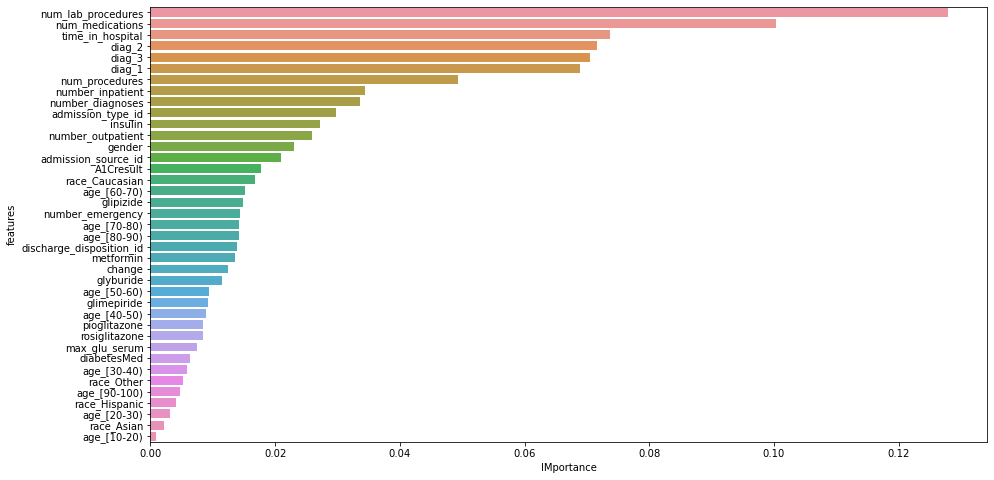

In [182]:
feature_imp=feature_imp.sort_values(by='IMportance',ascending=False)
sns.barplot(x='IMportance',y='features',data=feature_imp)
plt.show()


In [183]:
print('Decision tree training accuracy = ',dt.score(X_train,y_train))
print('Decision tree testing accuracy = ',dt.score(X_test,y_test))


Decision tree training accuracy =  1.0
Decision tree testing accuracy =  0.789845180622607


# Hyperparameters using GridSearchCV

In [145]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

In [146]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

In [147]:
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, cv = 5)

In [148]:
tree_grid_model = tree_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [193]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train, y_train)

NameError: name 'tree_grid_model' is not defined

In [ ]:
print('Classification Report for test set: \n', get_test_report(dt_model))

# Random Forest for Classification

In [149]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

In [150]:
rf_model = rf_classification.fit(X_train, y_train)

In [151]:
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     62129
           1       1.00      0.83      0.91      7950

    accuracy                           0.98     70079
   macro avg       0.99      0.91      0.95     70079
weighted avg       0.98      0.98      0.98     70079



In [152]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26628
           1       0.32      0.02      0.03      3407

    accuracy                           0.88     30035
   macro avg       0.61      0.51      0.49     30035
weighted avg       0.82      0.88      0.84     30035



In [157]:
rf_model.score(X_test,y_test)

0.8843682370567671

In [158]:
from sklearn.metrics import roc_auc_score


In [163]:
rf= RandomForestClassifier(oob_score=True,random_state=10)
rf.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=10)

In [164]:
y_pred_rf=rf.predict(X_test)
y_pred_probarf=rf.predict_proba(X_test)[:,1]


In [165]:
rf.oob_score_


0.8863996346979837

In [167]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probarf))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_rf))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_rf))


ROC-AUC Score =  0.630411423758462

Accuracy =  0.8864324954220076

Confusion Matrix =  
 [[26600    28]
 [ 3383    24]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26628
           1       0.46      0.01      0.01      3407

    accuracy                           0.89     30035
   macro avg       0.67      0.50      0.48     30035
weighted avg       0.84      0.89      0.83     30035



<AxesSubplot:>

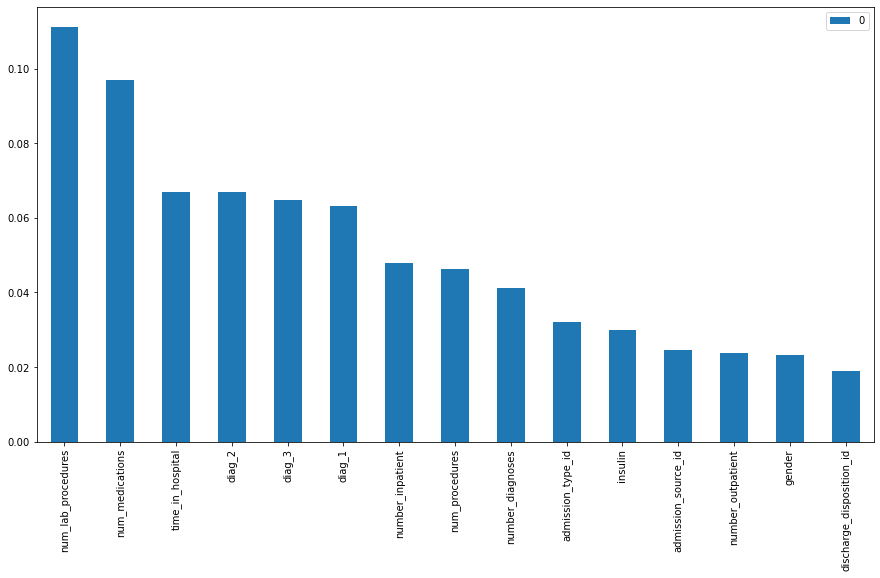

In [169]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns).sort_values(0,ascending=False).head(15).plot(kind='bar')

In [230]:
rf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

# Hyperparameters using GridSearchCV (Random Forest)

In [153]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

In [154]:
random_forest_classification = RandomForestClassifier(random_state = 10)

In [155]:
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

In [156]:
rf_grid_model = rf_grid.fit(X_train, y_train)

KeyboardInterrupt: 

# KNN- K - nearest neighbour

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn=KNeighborsClassifier()

In [187]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [188]:
y_pred_knn=knn.predict(X_test)
y_pred_probaknn=knn.predict_proba(X_test)[:,1]


In [189]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probaknn))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_knn))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_knn))


ROC-AUC Score =  0.5475971950493465

Accuracy =  0.8782753454303313

Confusion Matrix =  
 [[26242   386]
 [ 3270   137]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      0.99      0.93     26628
           1       0.26      0.04      0.07      3407

    accuracy                           0.88     30035
   macro avg       0.58      0.51      0.50     30035
weighted avg       0.82      0.88      0.84     30035



# Naive Bayes Algorithm

In [192]:
#categorical (BernouliNB)
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

# Bernouli nb

In [193]:
bnb=BernoulliNB()


In [196]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
y_pred_probabnb=bnb.predict_proba(X_test)[:,1]


In [198]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probabnb))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_bnb))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_bnb))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_bnb))

ROC-AUC Score =  0.624572714748096

Accuracy =  0.8863326119527218

Confusion Matrix =  
 [[26619     9]
 [ 3405     2]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26628
           1       0.18      0.00      0.00      3407

    accuracy                           0.89     30035
   macro avg       0.53      0.50      0.47     30035
weighted avg       0.81      0.89      0.83     30035



# Adaboost

In [199]:
from sklearn.ensemble import AdaBoostClassifier

In [200]:
ada=AdaBoostClassifier() 



In [201]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [202]:
y_pred_ada=ada.predict(X_test)
y_pred_probaada=ada.predict_proba(X_test)[:,1]


In [203]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probaada))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_ada))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_ada))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_ada))


ROC-AUC Score =  0.6595623163419656

Accuracy =  0.8865656733810554

Confusion Matrix =  
 [[26591    37]
 [ 3370    37]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26628
           1       0.50      0.01      0.02      3407

    accuracy                           0.89     30035
   macro avg       0.69      0.50      0.48     30035
weighted avg       0.84      0.89      0.84     30035



# Gradient Boost Classifier

In [204]:
from sklearn.ensemble import GradientBoostingClassifier

In [205]:
gba=GradientBoostingClassifier() 
gba.fit(X_train,y_train)


GradientBoostingClassifier()

In [206]:
y_pred_gba=gba.predict(X_test)
y_pred_probagba=gba.predict_proba(X_test)[:,1]


In [207]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probagba))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_gba))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_gba))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_gba))


ROC-AUC Score =  0.6653040693860809

Accuracy =  0.8869319127684369

Confusion Matrix =  
 [[26606    22]
 [ 3374    33]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26628
           1       0.60      0.01      0.02      3407

    accuracy                           0.89     30035
   macro avg       0.74      0.50      0.48     30035
weighted avg       0.85      0.89      0.84     30035



In [235]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

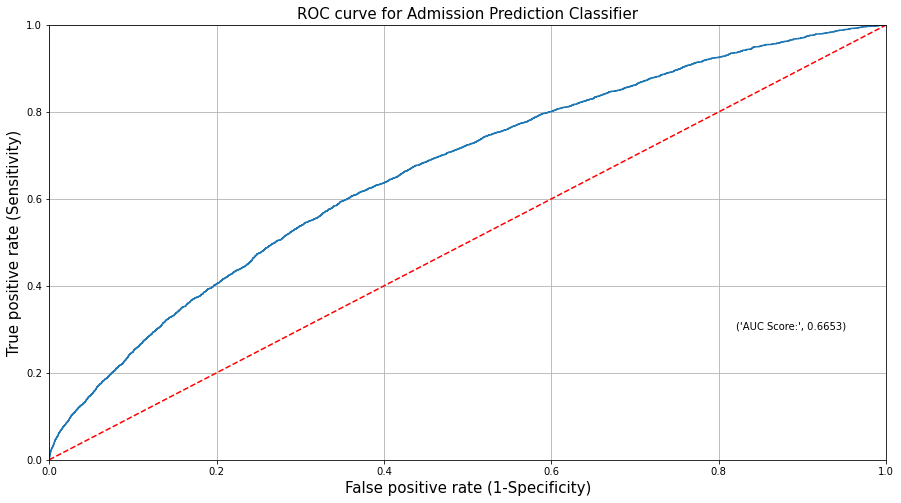

In [234]:
plot_roc(gba)

# XGBoost

In [211]:
!pip install xgboost

In [212]:
from xgboost import XGBClassifier


In [216]:
xgb = XGBClassifier(random_state=10)




In [217]:
params = {'n_estimators':range(2,30),
'max_depth':range(2,15),
'learning_rate':range(1,6)
}
rsearch = RandomizedSearchCV(estimator = xgb, param_distributions = params, cv = 5, scoring = 'accuracy')
rsearch.fit(X_train,y_train)


NameError: name 'RandomizedSearchCV' is not defined

# Bagging classifier

In [218]:
from sklearn.ensemble import BaggingClassifier


In [219]:
bc= BaggingClassifier(random_state=10)
bc.fit(X_train,y_train)


BaggingClassifier(random_state=10)

In [220]:
y_pred_bc=bc.predict(X_test)
y_pred_probabc=bc.predict_proba(X_test)[:,1]


In [221]:
print('ROC-AUC Score = ',roc_auc_score(y_test,y_pred_probabc))
print()
print('Accuracy = ',accuracy_score(y_test,y_pred_bc))
print()
print('Confusion Matrix = ','\n',confusion_matrix(y_test,y_pred_bc))
print()
print('Classification Report = ','\n',classification_report(y_test,y_pred_bc))

ROC-AUC Score =  0.5835180082149348

Accuracy =  0.8818378558348593

Confusion Matrix =  
 [[26387   241]
 [ 3308    99]]

Classification Report =  
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     26628
           1       0.29      0.03      0.05      3407

    accuracy                           0.88     30035
   macro avg       0.59      0.51      0.49     30035
weighted avg       0.82      0.88      0.84     30035



In [223]:
lr=LogisticRegression()
knn=KNeighborsClassifier()


In [224]:
bag_knn=BaggingClassifier(base_estimator=knn,random_state=10)
bag_knn.fit(X_train,y_train)


BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=10)

In [226]:
y_pred_bag_knn=bag_knn.predict(X_test)



In [ ]:
y_pred_probabag_knn=bag_knn.predict_proba(X_test)[:,1]


In [222]:
print(bag_knn.score(X_train,y_train))
print(bag_knn.score(X_test,y_test))


NameError: name 'bag_knn' is not defined

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
